# Current status of Wikidata chemical data -  an overview

In [1]:
import urllib
import pandas as pd
import numpy as np


wd_chem_data = pd.read_csv('wd_chem_2017-07-26.csv', low_memory=False, index_col=0, 
                           dtype={'drugbank': np.str, 'iuphar': np.str})

wd_chem_data['article'] = wd_chem_data.loc[wd_chem_data['article'].map(
                lambda x: pd.notnull(x)), 'article'].map(lambda x: urllib.parse.unquote(x))


wp_chem_data = pd.read_csv('wp_chem_data_2017-07-26.csv', low_memory=False, index_col=0, 
                          dtype={'pageid': np.str})

wp_chem_data['DrugBank'] = wp_chem_data.loc[wp_chem_data['DrugBank'].map(
                lambda x: pd.notnull(x)), 'DrugBank'].map(lambda x: x[2:])

wp_chem_data['ChEMBL'] = wp_chem_data.loc[wp_chem_data['ChEMBL'].map(
                lambda x: pd.notnull(x)), 'ChEMBL'].map(lambda x: '|'.join(['CHEMBL' + y for y in x.split('|')]))

# What data on chemical compounds is in Wikidata

In [2]:
wd_chem_data.count()

Unnamed: 0          159599
cmpnd.1             159599
article              17129
mass                147321
chemSpider          122692
pubchem_cid         145288
unii                 58349
mesh_id                976
kegg_id              12964
mesh_code                8
chebi                82538
drugbank              7167
chembl               49593
iuphar                5916
cas                  71650
csmiles             151796
inchi               148967
inchi_key           151637
chemical_formula    148362
atc_code              1775
ismiles              84246
dtype: int64

# What data on chemical compounds is in the English Wikipedia?

In [3]:
wp_chem_data.count()

page_title          17431
pageid              17431
SystematicName        623
OtherNames           6455
synonyms             1700
IUPHAR_ligand        2027
CASNo                9270
CAS_number           6215
UNII                 6779
SMILES              10236
KEGG                 4475
ChEMBL               6359
ChEBI                   0
ChemSpiderID        15581
DrugBank             2114
PubChem             14230
StdInChI            13463
StdInChIKey         13434
InChI                7174
InChIKey             6645
ATC_code             4112
molecular_weight     5926
dtype: int64

In [36]:
import wikidataintegrator as wdi

def get_qid(iwlink):
    query = '''
    SELECT ?qid WHERE {{
        <{}> schema:about ?qid .
    }}
    '''
    iwlink = iwlink.replace(' ', '_')
    wp_base_url = 'https://en.wikipedia.org/wiki/'
    if iwlink.startswith(wp_base_url):
        iwlink = iwlink[30:]
    elif iwlink.startswith('http://en.wikipedia.org/wiki/'):
        iwlink = iwlink[29:]
    
#     iwlink = urllib.parse.quote(iwlink, safe='')
    iwlink = urllib.parse.unquote(iwlink)
    iwlink = wp_base_url + iwlink
    
    results = wdi.wdi_core.WDItemEngine.execute_sparql_query(query=query.format(iwlink))
    
    for x in results['results']['bindings']:
        if x['qid'] and x['qid']['value']:
            return x['qid']['value']
        else:
            return ''
        
    return ''
        
        
test_url = 'https://en.wikipedia.org/wiki/Paracetamol/metoclopramide'
print(get_qid(test_url))


http://www.wikidata.org/entity/Q7133847


In [37]:
# get all Wikipedia articles w/o Wikidata item
all_stuff = set()
existing_interwiki_links = [x[30:] for x in wd_chem_data['article'].dropna()]
na_wd_count = 0
na_wd_cid_count = 0

print('''{| class="wikitable"
|-
! Wikidata item !! Wikipedia page !! fixed
|-''')

for index, x in wp_chem_data.iterrows():
    if x['page_title'] not in existing_interwiki_links:
        qid = get_qid(x['page_title'])
#         print(qid)
#         print(x['page_title'])
        print('| '+ qid + ' || ' + 'https://en.wikipedia.org/wiki/{}'
              .format(x['page_title'].replace(' ', '_')) + ' || \n|-')
        na_wd_count += 1
        all_stuff.add(x['page_title'])
        if pd.notnull(x['PubChem']):
            na_wd_cid_count += 1

print('|}')
            
print(na_wd_count)
print(na_wd_cid_count)

{| class="wikitable"
|-
! Wikidata item !! Wikipedia page !! fixed
|-
| http://www.wikidata.org/entity/Q412350 || https://en.wikipedia.org/wiki/Amyl_nitrite || 
|-
| http://www.wikidata.org/entity/Q798309 || https://en.wikipedia.org/wiki/BCG_vaccine || 
|-
| http://www.wikidata.org/entity/Q948232 || https://en.wikipedia.org/wiki/Coal_tar || 
|-
| http://www.wikidata.org/entity/Q207920 || https://en.wikipedia.org/wiki/Gamma-Hydroxybutyric_acid || 
|-
| http://www.wikidata.org/entity/Q23118 || https://en.wikipedia.org/wiki/Lysergic_acid_diethylamide || 
|-
| http://www.wikidata.org/entity/Q410179 || https://en.wikipedia.org/wiki/Sodium_thiopental || 
|-
| http://www.wikidata.org/entity/Q199678 || https://en.wikipedia.org/wiki/Vitamin_C || 
|-
| http://www.wikidata.org/entity/Q208413 || https://en.wikipedia.org/wiki/Botulinum_toxin || 
|-
| http://www.wikidata.org/entity/Q2178381 || https://en.wikipedia.org/wiki/Darbepoetin_alfa || 
|-
| http://www.wikidata.org/entity/Q908104 || https://e

| http://www.wikidata.org/entity/Q22075855 || https://en.wikipedia.org/wiki/Protamine_sulfate || 
|-
| http://www.wikidata.org/entity/Q425536 || https://en.wikipedia.org/wiki/Orotic_acid || 
|-
| http://www.wikidata.org/entity/Q3533237 || https://en.wikipedia.org/wiki/Tricaine_mesylate || 
|-
| http://www.wikidata.org/entity/Q218507 || https://en.wikipedia.org/wiki/Zoledronic_acid || 
|-
| http://www.wikidata.org/entity/Q21163330 || https://en.wikipedia.org/wiki/Granulocyte_macrophage_colony-stimulating_factor || 
|-
| http://www.wikidata.org/entity/Q421475 || https://en.wikipedia.org/wiki/Beclometasone_dipropionate || 
|-
| http://www.wikidata.org/entity/Q7801054 || https://en.wikipedia.org/wiki/Tienilic_acid || 
|-
| http://www.wikidata.org/entity/Q3604308 || https://en.wikipedia.org/wiki/Cefuroxime_axetil || 
|-
| http://www.wikidata.org/entity/Q418666 || https://en.wikipedia.org/wiki/Tranexamic_acid || 
|-
|  || https://en.wikipedia.org/wiki/Ringer's_lactate_solution || 
|-
| http:

| http://www.wikidata.org/entity/Q413755 || https://en.wikipedia.org/wiki/Benzyl_benzoate || 
|-
| http://www.wikidata.org/entity/Q3149137 || https://en.wikipedia.org/wiki/Rho(D)_immune_globulin || 
|-
| http://www.wikidata.org/entity/Q3470652 || https://en.wikipedia.org/wiki/Samarium_(153Sm)_lexidronam || 
|-
| http://www.wikidata.org/entity/Q3221044 || https://en.wikipedia.org/wiki/Nitroglycerin_(drug) || 
|-
| http://www.wikidata.org/entity/Q7700570 || https://en.wikipedia.org/wiki/Atenolol/chlorthalidone || 
|-
| http://www.wikidata.org/entity/Q7553347 || https://en.wikipedia.org/wiki/Sodium_oxybate || 
|-
| http://www.wikidata.org/entity/Q15409391 || https://en.wikipedia.org/wiki/Metenolone_enanthate || 
|-
| http://www.wikidata.org/entity/Q15409422 || https://en.wikipedia.org/wiki/Isosorbide_dinitrate/hydralazine || 
|-
| http://www.wikidata.org/entity/Q5396485 || https://en.wikipedia.org/wiki/Erythromycin/isotretinoin || 
|-
| http://www.wikidata.org/entity/Q5137438 || https://e

| http://www.wikidata.org/entity/Q7230068 || https://en.wikipedia.org/wiki/Porfimer_sodium || 
|-
| http://www.wikidata.org/entity/Q619603 || https://en.wikipedia.org/wiki/Methyl_aminolevulinate || 
|-
| http://www.wikidata.org/entity/Q1187179 || https://en.wikipedia.org/wiki/Denileukin_diftitox || 
|-
| http://www.wikidata.org/entity/Q7115043 || https://en.wikipedia.org/wiki/Oxabolone_cipionate || 
|-
| http://www.wikidata.org/entity/Q5405160 || https://en.wikipedia.org/wiki/Etynodiol_diacetate || 
|-
| http://www.wikidata.org/entity/Q6808975 || https://en.wikipedia.org/wiki/Megestrol_acetate || 
|-
| http://www.wikidata.org/entity/Q5553699 || https://en.wikipedia.org/wiki/Gestonorone_caproate || 
|-
| http://www.wikidata.org/entity/Q4675115 || https://en.wikipedia.org/wiki/Acridine_carboxamide || 
|-
| http://www.wikidata.org/entity/Q924467 || https://en.wikipedia.org/wiki/Fluocinolone_acetonide || 
|-
| http://www.wikidata.org/entity/Q5462884 || https://en.wikipedia.org/wiki/Flupero

| http://www.wikidata.org/entity/Q4596754 || https://en.wikipedia.org/wiki/2,3,4,5-Tetramethoxyamphetamine || 
|-
| http://www.wikidata.org/entity/Q418735 || https://en.wikipedia.org/wiki/Hygromycin_B || 
|-
| http://www.wikidata.org/entity/Q3604498 || https://en.wikipedia.org/wiki/Ajulemic_acid || 
|-
| http://www.wikidata.org/entity/Q11786072 || https://en.wikipedia.org/wiki/Motexafin_gadolinium || 
|-
| http://www.wikidata.org/entity/Q4860325 || https://en.wikipedia.org/wiki/Prostaglandin_E || 
|-
| http://www.wikidata.org/entity/Q7074891 || https://en.wikipedia.org/wiki/Obetrol || 
|-
| http://www.wikidata.org/entity/Q15409385 || https://en.wikipedia.org/wiki/Methyl-MMDA-2 || 
|-
| http://www.wikidata.org/entity/Q410965 || https://en.wikipedia.org/wiki/Insulin_detemir || 
|-
| http://www.wikidata.org/entity/Q5308606 || https://en.wikipedia.org/wiki/Drostanolone_propionate || 
|-
| http://www.wikidata.org/entity/Q6804391 || https://en.wikipedia.org/wiki/Mecasermin_rinfabate || 
|-
|

| http://www.wikidata.org/entity/Q7553299 || https://en.wikipedia.org/wiki/Sodium_aurothiosulfate || 
|-
| http://www.wikidata.org/entity/Q5383795 || https://en.wikipedia.org/wiki/Epoetin_beta || 
|-
| http://www.wikidata.org/entity/Q7250475 || https://en.wikipedia.org/wiki/Propylketobemidone || 
|-
| http://www.wikidata.org/entity/Q5137423 || https://en.wikipedia.org/wiki/Co-amilofruse || 
|-
| http://www.wikidata.org/entity/Q5137510 || https://en.wikipedia.org/wiki/Co-tenidone || 
|-
| http://www.wikidata.org/entity/Q5279649 || https://en.wikipedia.org/wiki/Dioxaphetyl_butyrate || 
|-
| http://www.wikidata.org/entity/Q7199029 || https://en.wikipedia.org/wiki/Pitrakinra || 
|-
| http://www.wikidata.org/entity/Q5520257 || https://en.wikipedia.org/wiki/Gamma-Amino-beta-hydroxybutyric_acid || 
|-
| http://www.wikidata.org/entity/Q7178320 || https://en.wikipedia.org/wiki/Pethidinic_acid || 
|-
| http://www.wikidata.org/entity/Q7178319 || https://en.wikipedia.org/wiki/Pethidine_intermediat

| http://www.wikidata.org/entity/Q4915436 || https://en.wikipedia.org/wiki/Biphenylindanone_A || 
|-
| http://www.wikidata.org/entity/Q7697277 || https://en.wikipedia.org/wiki/Telimomab_aritox || 
|-
| http://www.wikidata.org/entity/Q15708812 || https://en.wikipedia.org/wiki/Technetium_(99mTc)_votumumab || 
|-
|  || https://en.wikipedia.org/wiki/Prasterone_sulfate || 
|-
| http://www.wikidata.org/entity/Q855474 || https://en.wikipedia.org/wiki/AS-19_(drug) || 
|-
| http://www.wikidata.org/entity/Q3678265 || https://en.wikipedia.org/wiki/Citatuzumab_bogatox || 
|-
| http://www.wikidata.org/entity/Q734985 || https://en.wikipedia.org/wiki/Alacizumab_pegol || 
|-
| http://www.wikidata.org/entity/Q5140136 || https://en.wikipedia.org/wiki/Codeine_methylbromide || 
|-
| http://www.wikidata.org/entity/Q6710118 || https://en.wikipedia.org/wiki/Lysergic_acid_2,4-dimethylazetidide || 
|-
| http://www.wikidata.org/entity/Q15409386 || https://en.wikipedia.org/wiki/Methylisopropyllysergamide || 
|-


| http://www.wikidata.org/entity/Q7692231 || https://en.wikipedia.org/wiki/Technetium_(99mTc)_tetrofosmin || 
|-
| http://www.wikidata.org/entity/Q7856945 || https://en.wikipedia.org/wiki/Tutin_(toxin) || 
|-
| http://www.wikidata.org/entity/Q7239695 || https://en.wikipedia.org/wiki/Prednisolone/promethazine || 
|-
| http://www.wikidata.org/entity/Q3143635 || https://en.wikipedia.org/wiki/Sodium_hyaluronate || 
|-
| http://www.wikidata.org/entity/Q4653314 || https://en.wikipedia.org/wiki/APICA_(drug) || 
|-
| http://www.wikidata.org/entity/Q6460427 || https://en.wikipedia.org/wiki/LY-344,545 || 
|-
| http://www.wikidata.org/entity/Q7387038 || https://en.wikipedia.org/wiki/S-23_(drug) || 
|-
| http://www.wikidata.org/entity/Q6458311 || https://en.wikipedia.org/wiki/LGD-3303 || 
|-
| http://www.wikidata.org/entity/Q4836620 || https://en.wikipedia.org/wiki/BSPP_(drug) || 
|-
| http://www.wikidata.org/entity/Q7089373 || https://en.wikipedia.org/wiki/Omacetaxine_mepesuccinate || 
|-
| http:

| http://www.wikidata.org/entity/Q5613310 || https://en.wikipedia.org/wiki/Guaifenesin/phenylephrine || 
|-
| http://www.wikidata.org/entity/Q3771944 || https://en.wikipedia.org/wiki/Glembatumumab_vedotin || 
|-
| http://www.wikidata.org/entity/Q5443206 || https://en.wikipedia.org/wiki/Fenclozic_acid || 
|-
| http://www.wikidata.org/entity/Q28444520 || https://en.wikipedia.org/wiki/Albutoin || 
|-
| http://www.wikidata.org/entity/Q4737371 || https://en.wikipedia.org/wiki/Aluminium_acetotartrate || 
|-
| http://www.wikidata.org/entity/Q388948 || https://en.wikipedia.org/wiki/Torreyanic_acid || 
|-
| http://www.wikidata.org/entity/Q5593643 || https://en.wikipedia.org/wiki/Gramicidin_B || 
|-
| http://www.wikidata.org/entity/Q5322564 || https://en.wikipedia.org/wiki/Tigilanol_tiglate || 
|-
| http://www.wikidata.org/entity/Q7912587 || https://en.wikipedia.org/wiki/Valproate_pivoxil || 
|-
| http://www.wikidata.org/entity/Q7670972 || https://en.wikipedia.org/wiki/TOL101 || 
|-
| http://www

| http://www.wikidata.org/entity/Q4874069 || https://en.wikipedia.org/wiki/Bay_R_1531 || 
|-
| http://www.wikidata.org/entity/Q4890968 || https://en.wikipedia.org/wiki/Beractant || 
|-
| http://www.wikidata.org/entity/Q5019575 || https://en.wikipedia.org/wiki/Calfactant || 
|-
| http://www.wikidata.org/entity/Q5473336 || https://en.wikipedia.org/wiki/Fosfomycin/tobramycin || 
|-
| http://www.wikidata.org/entity/Q28130108 || https://en.wikipedia.org/wiki/Testosterone_phenylpropionate || 
|-
| http://www.wikidata.org/entity/Q27088963 || https://en.wikipedia.org/wiki/Testosterone_decanoate || 
|-
| http://www.wikidata.org/entity/Q5462790 || https://en.wikipedia.org/wiki/Fluocinolone/hydroquinone/tretinoin || 
|-
| http://www.wikidata.org/entity/Q2214314 || https://en.wikipedia.org/wiki/Salicyluric_acid || 
|-
|  || https://en.wikipedia.org/wiki/Fluclorolone || 
|-
| http://www.wikidata.org/entity/Q4971701 || https://en.wikipedia.org/wiki/Brivanib_alaninate || 
|-
| http://www.wikidata.org

| http://www.wikidata.org/entity/Q17005864 || https://en.wikipedia.org/wiki/Bis-choline_tetrathiomolybdate || 
|-
| http://www.wikidata.org/entity/Q18204530 || https://en.wikipedia.org/wiki/Buprenorphine/samidorphan || 
|-
| http://www.wikidata.org/entity/Q18378831 || https://en.wikipedia.org/wiki/Apimostinel || 
|-
| http://www.wikidata.org/entity/Q18388297 || https://en.wikipedia.org/wiki/Dengue_vaccine || 
|-
| http://www.wikidata.org/entity/Q18349874 || https://en.wikipedia.org/wiki/DSP-2230 || 
|-
| http://www.wikidata.org/entity/Q18392912 || https://en.wikipedia.org/wiki/RG7314 || 
|-
| http://www.wikidata.org/entity/Q18211591 || https://en.wikipedia.org/wiki/TC_OT_39 || 
|-
| http://www.wikidata.org/entity/Q18085856 || https://en.wikipedia.org/wiki/RVSV-ZEBOV_vaccine || 
|-
| http://www.wikidata.org/entity/Q18386075 || https://en.wikipedia.org/wiki/Sucroferric_oxyhydroxide || 
|-
| http://www.wikidata.org/entity/Q18387529 || https://en.wikipedia.org/wiki/Pentavalent_vaccine || 


| http://www.wikidata.org/entity/Q21098968 || https://en.wikipedia.org/wiki/Trelagliptin || 
|-
| http://www.wikidata.org/entity/Q5721601 || https://en.wikipedia.org/wiki/Bismuth_subcitrate/metronidazole/tetracycline || 
|-
| http://www.wikidata.org/entity/Q25323757 || https://en.wikipedia.org/wiki/Aripiprazole_lauroxil || 
|-
| http://www.wikidata.org/entity/Q25091391 || https://en.wikipedia.org/wiki/Darolutamide || 
|-
| http://www.wikidata.org/entity/Q20817117 || https://en.wikipedia.org/wiki/Flumetasone_pivalate || 
|-
| http://www.wikidata.org/entity/Q25220853 || https://en.wikipedia.org/wiki/PF-3845 || 
|-
| http://www.wikidata.org/entity/Q21098983 || https://en.wikipedia.org/wiki/Norepinephrine_(medication) || 
|-
| http://www.wikidata.org/entity/Q25099761 || https://en.wikipedia.org/wiki/Lipo-oxytocin-1 || 
|-
| http://www.wikidata.org/entity/Q21098993 || https://en.wikipedia.org/wiki/3-Indolepropionic_acid || 
|-
| http://www.wikidata.org/entity/Q25099813 || https://en.wikiped

| http://www.wikidata.org/entity/Q22908451 || https://en.wikipedia.org/wiki/Fluoroethyl-L-tyrosine_(18F) || 
|-
|  || https://en.wikipedia.org/wiki/3'-Fluoro-3'-deoxythymidine || 
|-
| http://www.wikidata.org/entity/Q23044263 || https://en.wikipedia.org/wiki/Lifitegrast || 
|-
| http://www.wikidata.org/entity/Q25101403 || https://en.wikipedia.org/wiki/O-acylpseudotropine || 
|-
| http://www.wikidata.org/entity/Q22673321 || https://en.wikipedia.org/wiki/Elbasvir/grazoprevir || 
|-
| http://www.wikidata.org/entity/Q25101480 || https://en.wikipedia.org/wiki/Indusatumab_vedotin || 
|-
| http://www.wikidata.org/entity/Q21126717 || https://en.wikipedia.org/wiki/Urotensin_II-related_peptide || 
|-
| http://www.wikidata.org/entity/Q25323837 || https://en.wikipedia.org/wiki/4-Methoxybutyrfentanyl || 
|-
| http://www.wikidata.org/entity/Q25101668 || https://en.wikipedia.org/wiki/Ravidasvir || 
|-
| http://www.wikidata.org/entity/Q25101921 || https://en.wikipedia.org/wiki/Abituzumab || 
|-
| http

| http://www.wikidata.org/entity/Q24896686 || https://en.wikipedia.org/wiki/Calcium/cholecalciferol || 
|-
| http://www.wikidata.org/entity/Q24897556 || https://en.wikipedia.org/wiki/Cingestol || 
|-
| http://www.wikidata.org/entity/Q24897620 || https://en.wikipedia.org/wiki/Tigestol || 
|-
| http://www.wikidata.org/entity/Q24882947 || https://en.wikipedia.org/wiki/Segesterone || 
|-
| http://www.wikidata.org/entity/Q24882991 || https://en.wikipedia.org/wiki/Flugestone_acetate || 
|-
| http://www.wikidata.org/entity/Q24883012 || https://en.wikipedia.org/wiki/Flugestone || 
|-
| http://www.wikidata.org/entity/Q24883082 || https://en.wikipedia.org/wiki/Pentagestrone || 
|-
| http://www.wikidata.org/entity/Q24883083 || https://en.wikipedia.org/wiki/Pentagestrone_acetate || 
|-
| http://www.wikidata.org/entity/Q24896789 || https://en.wikipedia.org/wiki/ACE_inhibitor_and_thiazide_combination || 
|-
| http://www.wikidata.org/entity/Q24883815 || https://en.wikipedia.org/wiki/Estrofurate || 
|

| http://www.wikidata.org/entity/Q28209158 || https://en.wikipedia.org/wiki/Burapitant || 
|-
| http://www.wikidata.org/entity/Q28209159 || https://en.wikipedia.org/wiki/Methaniazide/thioacetazone || 
|-
| http://www.wikidata.org/entity/Q28155275 || https://en.wikipedia.org/wiki/Acetomepregenol || 
|-
| http://www.wikidata.org/entity/Q28209174 || https://en.wikipedia.org/wiki/Mytatrienediol || 
|-
| http://www.wikidata.org/entity/Q28209178 || https://en.wikipedia.org/wiki/Brilanestrant || 
|-
| http://www.wikidata.org/entity/Q28209181 || https://en.wikipedia.org/wiki/Elacestrant || 
|-
| http://www.wikidata.org/entity/Q28209187 || https://en.wikipedia.org/wiki/Hydrocodone/aspirin || 
|-
| http://www.wikidata.org/entity/Q28209191 || https://en.wikipedia.org/wiki/Oxycodone/ibuprofen || 
|-
| http://www.wikidata.org/entity/Q28209196 || https://en.wikipedia.org/wiki/Bisdehydrodoisynolic_acid || 
|-
| http://www.wikidata.org/entity/Q28209197 || https://en.wikipedia.org/wiki/Dianol || 
|-
| 

|  || https://en.wikipedia.org/wiki/11β-Methyl-19-nortestosterone || 
|-
| http://www.wikidata.org/entity/Q28132014 || https://en.wikipedia.org/wiki/Levonorgestrel_butanoate || 
|-
| http://www.wikidata.org/entity/Q28209541 || https://en.wikipedia.org/wiki/Metallibure || 
|-
| http://www.wikidata.org/entity/Q28132015 || https://en.wikipedia.org/wiki/19-Nor-5-androstenediol || 
|-
| http://www.wikidata.org/entity/Q28132016 || https://en.wikipedia.org/wiki/19-Nor-5-androstenedione || 
|-
| http://www.wikidata.org/entity/Q28132018 || https://en.wikipedia.org/wiki/YK-11 || 
|-
| http://www.wikidata.org/entity/Q28132020 || https://en.wikipedia.org/wiki/Testosterone_benzoate || 
|-
| http://www.wikidata.org/entity/Q28132021 || https://en.wikipedia.org/wiki/Testosterone_palmitate || 
|-
| http://www.wikidata.org/entity/Q28132023 || https://en.wikipedia.org/wiki/Testosterone_stearate || 
|-
| http://www.wikidata.org/entity/Q28132024 || https://en.wikipedia.org/wiki/Testosterone_phenylbutyrate 

| http://www.wikidata.org/entity/Q28209867 || https://en.wikipedia.org/wiki/Merestinib || 
|-
| http://www.wikidata.org/entity/Q28209870 || https://en.wikipedia.org/wiki/Ralimetinib || 
|-
| http://www.wikidata.org/entity/Q28209872 || https://en.wikipedia.org/wiki/Galunisertib || 
|-
| http://www.wikidata.org/entity/Q28209876 || https://en.wikipedia.org/wiki/Ipatasertib || 
|-
| http://www.wikidata.org/entity/Q28209878 || https://en.wikipedia.org/wiki/Taselisib || 
|-
| http://www.wikidata.org/entity/Q28196260 || https://en.wikipedia.org/wiki/Alcohol_(medical_use) || 
|-
| http://www.wikidata.org/entity/Q28450343 || https://en.wikipedia.org/wiki/Opicapone || 
|-
| http://www.wikidata.org/entity/Q28196266 || https://en.wikipedia.org/wiki/Iodine_(medical_use) || 
|-
| http://www.wikidata.org/entity/Q28209884 || https://en.wikipedia.org/wiki/Lorlatinib || 
|-
| http://www.wikidata.org/entity/Q28209887 || https://en.wikipedia.org/wiki/Gandotinib || 
|-
| http://www.wikidata.org/entity/Q282

| http://www.wikidata.org/entity/Q30315023 || https://en.wikipedia.org/wiki/Beclometasone/formoterol/glycopyrronium || 
|-
| http://www.wikidata.org/entity/Q30315069 || https://en.wikipedia.org/wiki/Chaetochromin || 
|-
| http://www.wikidata.org/entity/Q30315072 || https://en.wikipedia.org/wiki/BNN-20 || 
|-
| http://www.wikidata.org/entity/Q30315082 || https://en.wikipedia.org/wiki/BNN-27 || 
|-
| http://www.wikidata.org/entity/Q30315085 || https://en.wikipedia.org/wiki/Cetadiol || 
|-
| http://www.wikidata.org/entity/Q30315086 || https://en.wikipedia.org/wiki/Spiroxasone || 
|-
| http://www.wikidata.org/entity/Q30315087 || https://en.wikipedia.org/wiki/Dicirenone || 
|-
| http://www.wikidata.org/entity/Q30315089 || https://en.wikipedia.org/wiki/Cyclopregnol || 
|-
| http://www.wikidata.org/entity/Q30315090 || https://en.wikipedia.org/wiki/Sturamustine || 
|-
| http://www.wikidata.org/entity/Q30315092 || https://en.wikipedia.org/wiki/Normustine || 
|-
| http://www.wikidata.org/entity/

|  || https://en.wikipedia.org/wiki/Buspirone/testosterone || 
|-
|  || https://en.wikipedia.org/wiki/MK-386 || 
|-
| http://www.wikidata.org/entity/Q33626059 || https://en.wikipedia.org/wiki/Cerliponase_alfa || 
|-
| http://www.wikidata.org/entity/Q33302196 || https://en.wikipedia.org/wiki/Pemafibrate || 
|-
| http://www.wikidata.org/entity/Q80863 || https://en.wikipedia.org/wiki/Adenosine_triphosphate || 
|-
| http://www.wikidata.org/entity/Q193598 || https://en.wikipedia.org/wiki/Ascorbic_acid_(molecular_aspects) || 
|-
| http://www.wikidata.org/entity/Q410193 || https://en.wikipedia.org/wiki/Boron_nitride || 
|-
| http://www.wikidata.org/entity/Q191700 || https://en.wikipedia.org/wiki/Benzoic_acid || 
|-
| http://www.wikidata.org/entity/Q146578 || https://en.wikipedia.org/wiki/Bakelite || 
|-
| http://www.wikidata.org/entity/Q1997 || https://en.wikipedia.org/wiki/Carbon_dioxide || 
|-
| http://www.wikidata.org/entity/Q181699 || https://en.wikipedia.org/wiki/Carbonate || 
|-
| http:

| http://www.wikidata.org/entity/Q170591 || https://en.wikipedia.org/wiki/Hydrogen_sulfide || 
|-
| http://www.wikidata.org/entity/Q36200 || https://en.wikipedia.org/wiki/Zirconium_dioxide || 
|-
| http://www.wikidata.org/entity/Q179731 || https://en.wikipedia.org/wiki/Sodium_bicarbonate || 
|-
| http://www.wikidata.org/entity/Q190227 || https://en.wikipedia.org/wiki/Sodium_carbonate || 
|-
| http://www.wikidata.org/entity/Q214863 || https://en.wikipedia.org/wiki/Iron(II)_sulfate || 
|-
| http://www.wikidata.org/entity/Q184630 || https://en.wikipedia.org/wiki/Potassium_chloride || 
|-
| http://www.wikidata.org/entity/Q214769 || https://en.wikipedia.org/wiki/Magnesium_oxide || 
|-
| http://www.wikidata.org/entity/Q209357 || https://en.wikipedia.org/wiki/CS_gas || 
|-
| http://www.wikidata.org/entity/Q161249 || https://en.wikipedia.org/wiki/Lactic_acid || 
|-
| http://www.wikidata.org/entity/Q146123 || https://en.wikipedia.org/wiki/Poly(methyl_methacrylate) || 
|-
| http://www.wikidata.o

| http://www.wikidata.org/entity/Q423876 || https://en.wikipedia.org/wiki/Phthalic_acid || 
|-
| http://www.wikidata.org/entity/Q410882 || https://en.wikipedia.org/wiki/Phthalic_anhydride || 
|-
| http://www.wikidata.org/entity/Q208451 || https://en.wikipedia.org/wiki/Calcium_chloride || 
|-
| http://www.wikidata.org/entity/Q5103099 || https://en.wikipedia.org/wiki/Chloromethyl_chloroformate || 
|-
| http://www.wikidata.org/entity/Q303489 || https://en.wikipedia.org/wiki/Potassium_sodium_tartrate || 
|-
| http://www.wikidata.org/entity/Q21099362 || https://en.wikipedia.org/wiki/Aristolochic_acid || 
|-
| http://www.wikidata.org/entity/Q1344375 || https://en.wikipedia.org/wiki/Radium_chloride || 
|-
| http://www.wikidata.org/entity/Q408634 || https://en.wikipedia.org/wiki/Ethidium_bromide || 
|-
| http://www.wikidata.org/entity/Q411041 || https://en.wikipedia.org/wiki/Substance_P || 
|-
| http://www.wikidata.org/entity/Q28775 || https://en.wikipedia.org/wiki/Nicotinamide_adenine_dinucle

| http://www.wikidata.org/entity/Q242715 || https://en.wikipedia.org/wiki/Sulfur_trioxide || 
|-
| http://www.wikidata.org/entity/Q408458 || https://en.wikipedia.org/wiki/Dinitrogen_pentoxide || 
|-
| http://www.wikidata.org/entity/Q411822 || https://en.wikipedia.org/wiki/Xenon_tetroxide || 
|-
| http://www.wikidata.org/entity/Q421888 || https://en.wikipedia.org/wiki/Ammonia_solution || 
|-
| http://www.wikidata.org/entity/Q407258 || https://en.wikipedia.org/wiki/Calcium_sulfate || 
|-
| http://www.wikidata.org/entity/Q201312 || https://en.wikipedia.org/wiki/S-Adenosyl_methionine || 
|-
| http://www.wikidata.org/entity/Q410768 || https://en.wikipedia.org/wiki/Xanthan_gum || 
|-
| http://www.wikidata.org/entity/Q727742 || https://en.wikipedia.org/wiki/Propylene_oxide || 
|-
| http://www.wikidata.org/entity/Q407605 || https://en.wikipedia.org/wiki/Barium_hydroxide || 
|-
| http://www.wikidata.org/entity/Q423245 || https://en.wikipedia.org/wiki/Hydrobromic_acid || 
|-
| http://www.wikidat

| http://www.wikidata.org/entity/Q5572621 || https://en.wikipedia.org/wiki/Glycol_stearate || 
|-
| http://www.wikidata.org/entity/Q407515 || https://en.wikipedia.org/wiki/Silver_bromide || 
|-
| http://www.wikidata.org/entity/Q284549 || https://en.wikipedia.org/wiki/Sodium_metabisulfite || 
|-
| http://www.wikidata.org/entity/Q417922 || https://en.wikipedia.org/wiki/CR_gas || 
|-
| http://www.wikidata.org/entity/Q417928 || https://en.wikipedia.org/wiki/Ceric_ammonium_nitrate || 
|-
| http://www.wikidata.org/entity/Q409224 || https://en.wikipedia.org/wiki/Barium_carbonate || 
|-
| http://www.wikidata.org/entity/Q413471 || https://en.wikipedia.org/wiki/Titanium_tetrachloride || 
|-
| http://www.wikidata.org/entity/Q411752 || https://en.wikipedia.org/wiki/Magnesium_fluoride || 
|-
| http://www.wikidata.org/entity/Q114174 || https://en.wikipedia.org/wiki/Glucono_delta-lactone || 
|-
| http://www.wikidata.org/entity/Q271980 || https://en.wikipedia.org/wiki/Bisphenol_A || 
|-
| http://www.w

| http://www.wikidata.org/entity/Q6578680 || https://en.wikipedia.org/wiki/Ethyl_oleate || 
|-
| http://www.wikidata.org/entity/Q4634115 || https://en.wikipedia.org/wiki/3-Aminopyridine-2-carboxaldehyde_thiosemicarbazone || 
|-
| http://www.wikidata.org/entity/Q4637188 || https://en.wikipedia.org/wiki/4-Nitroquinoline_1-oxide || 
|-
| http://www.wikidata.org/entity/Q407153 || https://en.wikipedia.org/wiki/Ethyl_acetate || 
|-
| http://www.wikidata.org/entity/Q414189 || https://en.wikipedia.org/wiki/Methyl_acetate || 
|-
| http://www.wikidata.org/entity/Q407806 || https://en.wikipedia.org/wiki/Sodium_sulfite || 
|-
| http://www.wikidata.org/entity/Q411235 || https://en.wikipedia.org/wiki/Iron(II,III)_oxide || 
|-
| http://www.wikidata.org/entity/Q409591 || https://en.wikipedia.org/wiki/Vinyl_alcohol || 
|-
| http://www.wikidata.org/entity/Q205004 || https://en.wikipedia.org/wiki/Tin(IV)_chloride || 
|-
| http://www.wikidata.org/entity/Q421570 || https://en.wikipedia.org/wiki/T-2_mycotox

| http://www.wikidata.org/entity/Q416860 || https://en.wikipedia.org/wiki/Carminic_acid || 
|-
| http://www.wikidata.org/entity/Q2754914 || https://en.wikipedia.org/wiki/Cellulose_triacetate || 
|-
| http://www.wikidata.org/entity/Q409171 || https://en.wikipedia.org/wiki/Thionyl_chloride || 
|-
| http://www.wikidata.org/entity/Q1890796 || https://en.wikipedia.org/wiki/Mannitol_hexanitrate || 
|-
| http://www.wikidata.org/entity/Q409602 || https://en.wikipedia.org/wiki/Boron_trifluoride || 
|-
| http://www.wikidata.org/entity/Q4880765 || https://en.wikipedia.org/wiki/Behentrimonium_chloride || 
|-
| http://www.wikidata.org/entity/Q619868 || https://en.wikipedia.org/wiki/Novec_1230 || 
|-
| http://www.wikidata.org/entity/Q424531 || https://en.wikipedia.org/wiki/Erythorbic_acid || 
|-
| http://www.wikidata.org/entity/Q411314 || https://en.wikipedia.org/wiki/Cyanuric_acid || 
|-
| http://www.wikidata.org/entity/Q418504 || https://en.wikipedia.org/wiki/Tetrasodium_pyrophosphate || 
|-
| htt

| http://www.wikidata.org/entity/Q2462 || https://en.wikipedia.org/wiki/Hydrogen_iodide || 
|-
| http://www.wikidata.org/entity/Q423738 || https://en.wikipedia.org/wiki/Diethyl_azodicarboxylate || 
|-
| http://www.wikidata.org/entity/Q418616 || https://en.wikipedia.org/wiki/Indium_nitride || 
|-
| http://www.wikidata.org/entity/Q1184988 || https://en.wikipedia.org/wiki/Cyanogen_iodide || 
|-
| http://www.wikidata.org/entity/Q412304 || https://en.wikipedia.org/wiki/Sulfamic_acid || 
|-
| http://www.wikidata.org/entity/Q414685 || https://en.wikipedia.org/wiki/Yttrium(III)_oxide || 
|-
| http://www.wikidata.org/entity/Q376061 || https://en.wikipedia.org/wiki/Flavin_mononucleotide || 
|-
| http://www.wikidata.org/entity/Q408929 || https://en.wikipedia.org/wiki/Peroxymonosulfuric_acid || 
|-
| http://www.wikidata.org/entity/Q422837 || https://en.wikipedia.org/wiki/Lead(II)_acetate || 
|-
| http://www.wikidata.org/entity/Q407743 || https://en.wikipedia.org/wiki/Phosphorous_acid || 
|-
| http

| http://www.wikidata.org/entity/Q420640 || https://en.wikipedia.org/wiki/Dioxygen_difluoride || 
|-
| http://www.wikidata.org/entity/Q412015 || https://en.wikipedia.org/wiki/Lithium_perchlorate || 
|-
| http://www.wikidata.org/entity/Q211207 || https://en.wikipedia.org/wiki/Silver_perchlorate || 
|-
| http://www.wikidata.org/entity/Q281419 || https://en.wikipedia.org/wiki/Sodium_periodate || 
|-
| http://www.wikidata.org/entity/Q417125 || https://en.wikipedia.org/wiki/Potassium_periodate || 
|-
| http://www.wikidata.org/entity/Q42038 || https://en.wikipedia.org/wiki/Maleic_acid || 
|-
| http://www.wikidata.org/entity/Q413075 || https://en.wikipedia.org/wiki/Tetraamminecopper(II)_sulfate || 
|-
| http://www.wikidata.org/entity/Q416310 || https://en.wikipedia.org/wiki/Beryllium_fluoride || 
|-
| http://www.wikidata.org/entity/Q414042 || https://en.wikipedia.org/wiki/Okadaic_acid || 
|-
|  || https://en.wikipedia.org/wiki/Adams's_catalyst || 
|-
| http://www.wikidata.org/entity/Q2407844 

| http://www.wikidata.org/entity/Q415791 || https://en.wikipedia.org/wiki/Iron(III)_bromide || 
|-
| http://www.wikidata.org/entity/Q425668 || https://en.wikipedia.org/wiki/Mesityl_oxide || 
|-
| http://www.wikidata.org/entity/Q412278 || https://en.wikipedia.org/wiki/Iron_pentacarbonyl || 
|-
| http://www.wikidata.org/entity/Q3395510 || https://en.wikipedia.org/wiki/Chlorinated_polyvinyl_chloride || 
|-
| http://www.wikidata.org/entity/Q5198692 || https://en.wikipedia.org/wiki/Cyclodecapentaene || 
|-
| http://www.wikidata.org/entity/Q420196 || https://en.wikipedia.org/wiki/Magic_acid || 
|-
| http://www.wikidata.org/entity/Q410830 || https://en.wikipedia.org/wiki/Shikimic_acid || 
|-
| http://www.wikidata.org/entity/Q423531 || https://en.wikipedia.org/wiki/Chorismic_acid || 
|-
| http://www.wikidata.org/entity/Q384709 || https://en.wikipedia.org/wiki/Ponceau_4R || 
|-
| http://www.wikidata.org/entity/Q423271 || https://en.wikipedia.org/wiki/Arsenous_acid || 
|-
| http://www.wikidata.o

| http://www.wikidata.org/entity/Q417658 || https://en.wikipedia.org/wiki/Lithium_sulfide || 
|-
| http://www.wikidata.org/entity/Q6343207 || https://en.wikipedia.org/wiki/Palladium(II)_acetate || 
|-
| http://www.wikidata.org/entity/Q339734 || https://en.wikipedia.org/wiki/Isethionic_acid || 
|-
| http://www.wikidata.org/entity/Q2628977 || https://en.wikipedia.org/wiki/Hafnium_tetrachloride || 
|-
| http://www.wikidata.org/entity/Q408349 || https://en.wikipedia.org/wiki/Erbium(III)_chloride || 
|-
| http://www.wikidata.org/entity/Q415113 || https://en.wikipedia.org/wiki/Gadolinium(III)_chloride || 
|-
| http://www.wikidata.org/entity/Q421389 || https://en.wikipedia.org/wiki/Germanium_tetrachloride || 
|-
| http://www.wikidata.org/entity/Q414866 || https://en.wikipedia.org/wiki/Thallium(I)_sulfate || 
|-
| http://www.wikidata.org/entity/Q411386 || https://en.wikipedia.org/wiki/Selenium_dioxide || 
|-
| http://www.wikidata.org/entity/Q6731396 || https://en.wikipedia.org/wiki/Magnesium_l

| http://www.wikidata.org/entity/Q1082890 || https://en.wikipedia.org/wiki/2-Iodoxybenzoic_acid || 
|-
| http://www.wikidata.org/entity/Q414207 || https://en.wikipedia.org/wiki/Crotonic_acid || 
|-
| http://www.wikidata.org/entity/Q1187765 || https://en.wikipedia.org/wiki/Sudan_III || 
|-
| http://www.wikidata.org/entity/Q7316807 || https://en.wikipedia.org/wiki/Retinyl_palmitate || 
|-
| http://www.wikidata.org/entity/Q364160 || https://en.wikipedia.org/wiki/Tocopheryl_acetate || 
|-
| http://www.wikidata.org/entity/Q903322 || https://en.wikipedia.org/wiki/Levulinic_acid || 
|-
| http://www.wikidata.org/entity/Q422597 || https://en.wikipedia.org/wiki/Hexanoic_acid || 
|-
| http://www.wikidata.org/entity/Q421667 || https://en.wikipedia.org/wiki/Aluminium_oxynitride || 
|-
| http://www.wikidata.org/entity/Q161660 || https://en.wikipedia.org/wiki/1-Naphthaleneacetic_acid || 
|-
| http://www.wikidata.org/entity/Q339657 || https://en.wikipedia.org/wiki/Paris_green || 
|-
| http://www.wikid

| http://www.wikidata.org/entity/Q2454591 || https://en.wikipedia.org/wiki/Phosphorus_sesquisulfide || 
|-
| http://www.wikidata.org/entity/Q417529 || https://en.wikipedia.org/wiki/Dimethyl_methylphosphonate || 
|-
| http://www.wikidata.org/entity/Q419695 || https://en.wikipedia.org/wiki/Copper(I)_cyanide || 
|-
| http://www.wikidata.org/entity/Q418539 || https://en.wikipedia.org/wiki/Antimycin_A || 
|-
| http://www.wikidata.org/entity/Q2616064 || https://en.wikipedia.org/wiki/Chromium_carbide || 
|-
| http://www.wikidata.org/entity/Q2348776 || https://en.wikipedia.org/wiki/Niobium_carbide || 
|-
| http://www.wikidata.org/entity/Q2615051 || https://en.wikipedia.org/wiki/Zirconium_carbide || 
|-
| http://www.wikidata.org/entity/Q421405 || https://en.wikipedia.org/wiki/Vanadium_carbide || 
|-
| http://www.wikidata.org/entity/Q410156 || https://en.wikipedia.org/wiki/Ammonium_acetate || 
|-
| http://www.wikidata.org/entity/Q4119947 || https://en.wikipedia.org/wiki/Neodymium_aluminium_borat

| http://www.wikidata.org/entity/Q425517 || https://en.wikipedia.org/wiki/Retinoic_acid || 
|-
| http://www.wikidata.org/entity/Q417527 || https://en.wikipedia.org/wiki/Sinapinic_acid || 
|-
| http://www.wikidata.org/entity/Q5058639 || https://en.wikipedia.org/wiki/Cembrene_A || 
|-
| http://www.wikidata.org/entity/Q408437 || https://en.wikipedia.org/wiki/EGTA_(chemical) || 
|-
| http://www.wikidata.org/entity/Q416077 || https://en.wikipedia.org/wiki/Cetrimonium_bromide || 
|-
| http://www.wikidata.org/entity/Q415536 || https://en.wikipedia.org/wiki/3-Methylbutanoic_acid || 
|-
| http://www.wikidata.org/entity/Q241678 || https://en.wikipedia.org/wiki/Mevalonic_acid || 
|-
| http://www.wikidata.org/entity/Q5404456 || https://en.wikipedia.org/wiki/Ethyl_isopropyl_ketone || 
|-
| http://www.wikidata.org/entity/Q413278 || https://en.wikipedia.org/wiki/Fluoroantimonic_acid || 
|-
| http://www.wikidata.org/entity/Q421647 || https://en.wikipedia.org/wiki/Triuranium_octoxide || 
|-
| http://ww

| http://www.wikidata.org/entity/Q419846 || https://en.wikipedia.org/wiki/Uranium_tetrafluoride || 
|-
| http://www.wikidata.org/entity/Q421620 || https://en.wikipedia.org/wiki/Uranyl_acetate || 
|-
| http://www.wikidata.org/entity/Q415872 || https://en.wikipedia.org/wiki/Boron_trichloride || 
|-
| http://www.wikidata.org/entity/Q425263 || https://en.wikipedia.org/wiki/Lead_telluride || 
|-
| http://www.wikidata.org/entity/Q165949 || https://en.wikipedia.org/wiki/Methacrylic_acid || 
|-
| http://www.wikidata.org/entity/Q420215 || https://en.wikipedia.org/wiki/Fluoroacetic_acid || 
|-
| http://www.wikidata.org/entity/Q421174 || https://en.wikipedia.org/wiki/Strontium_fluoride || 
|-
| http://www.wikidata.org/entity/Q6036 || https://en.wikipedia.org/wiki/Potassium_hydride || 
|-
| http://www.wikidata.org/entity/Q415804 || https://en.wikipedia.org/wiki/Boron_tribromide || 
|-
| http://www.wikidata.org/entity/Q425412 || https://en.wikipedia.org/wiki/Americium_dioxide || 
|-
| http://www.wi

| http://www.wikidata.org/entity/Q424551 || https://en.wikipedia.org/wiki/Sodium_ascorbate || 
|-
| http://www.wikidata.org/entity/Q2252299 || https://en.wikipedia.org/wiki/Potassium_ascorbate || 
|-
| http://www.wikidata.org/entity/Q7694635 || https://en.wikipedia.org/wiki/Teflic_acid || 
|-
| http://www.wikidata.org/entity/Q7168519 || https://en.wikipedia.org/wiki/Perilla_ketone || 
|-
| http://www.wikidata.org/entity/Q7376097 || https://en.wikipedia.org/wiki/Rubidium-82_chloride || 
|-
| http://www.wikidata.org/entity/Q6628390 || https://en.wikipedia.org/wiki/Padimate_O || 
|-
| http://www.wikidata.org/entity/Q6628408 || https://en.wikipedia.org/wiki/Padimate_A || 
|-
| http://www.wikidata.org/entity/Q3027892 || https://en.wikipedia.org/wiki/Plutonium_hydride || 
|-
| http://www.wikidata.org/entity/Q413491 || https://en.wikipedia.org/wiki/Elaidic_acid || 
|-
| http://www.wikidata.org/entity/Q908840 || https://en.wikipedia.org/wiki/Methyl_isothiocyanate || 
|-
| http://www.wikidata.o

| http://www.wikidata.org/entity/Q416962 || https://en.wikipedia.org/wiki/Caesium_chromate || 
|-
| http://www.wikidata.org/entity/Q2256493 || https://en.wikipedia.org/wiki/Tellurium_tetrachloride || 
|-
| http://www.wikidata.org/entity/Q417103 || https://en.wikipedia.org/wiki/Antimony_pentachloride || 
|-
| http://www.wikidata.org/entity/Q411225 || https://en.wikipedia.org/wiki/Xenon_difluoride || 
|-
| http://www.wikidata.org/entity/Q3270847 || https://en.wikipedia.org/wiki/Neopentyl_alcohol || 
|-
| http://www.wikidata.org/entity/Q3489655 || https://en.wikipedia.org/wiki/Vanadocene_dichloride || 
|-
| http://www.wikidata.org/entity/Q421255 || https://en.wikipedia.org/wiki/Vanadium_tetrachloride || 
|-
| http://www.wikidata.org/entity/Q2627834 || https://en.wikipedia.org/wiki/Sodium_cobaltinitrite || 
|-
| http://www.wikidata.org/entity/Q421260 || https://en.wikipedia.org/wiki/Vanadium(III)_chloride || 
|-
| http://www.wikidata.org/entity/Q416487 || https://en.wikipedia.org/wiki/Pent

| http://www.wikidata.org/entity/Q647580 || https://en.wikipedia.org/wiki/Zinc_peroxide || 
|-
| http://www.wikidata.org/entity/Q2342917 || https://en.wikipedia.org/wiki/Zirconium(IV)_silicate || 
|-
| http://www.wikidata.org/entity/Q2348790 || https://en.wikipedia.org/wiki/Zirconium(IV)_bromide || 
|-
| http://www.wikidata.org/entity/Q2256447 || https://en.wikipedia.org/wiki/Zirconium_tetrafluoride || 
|-
| http://www.wikidata.org/entity/Q2339944 || https://en.wikipedia.org/wiki/Zirconium(IV)_iodide || 
|-
| http://www.wikidata.org/entity/Q3265801 || https://en.wikipedia.org/wiki/Firefly_luciferin || 
|-
| http://www.wikidata.org/entity/Q204713 || https://en.wikipedia.org/wiki/Zinc_cyanide || 
|-
| http://www.wikidata.org/entity/Q204783 || https://en.wikipedia.org/wiki/Zinc_fluoride || 
|-
| http://www.wikidata.org/entity/Q204863 || https://en.wikipedia.org/wiki/Zinc_nitrate || 
|-
| http://www.wikidata.org/entity/Q408920 || https://en.wikipedia.org/wiki/Potassium_sulfide || 
|-
| htt

| http://www.wikidata.org/entity/Q217994 || https://en.wikipedia.org/wiki/Silicon_tetraiodide || 
|-
| http://www.wikidata.org/entity/Q2232750 || https://en.wikipedia.org/wiki/Silicon_disulfide || 
|-
| http://www.wikidata.org/entity/Q927885 || https://en.wikipedia.org/wiki/Sodium_hexafluoroaluminate || 
|-
| http://www.wikidata.org/entity/Q2405605 || https://en.wikipedia.org/wiki/Sodium_telluride || 
|-
| http://www.wikidata.org/entity/Q2048340 || https://en.wikipedia.org/wiki/Sodium_metatitanate || 
|-
| http://www.wikidata.org/entity/Q418803 || https://en.wikipedia.org/wiki/Strontium_hexaboride || 
|-
| http://www.wikidata.org/entity/Q421083 || https://en.wikipedia.org/wiki/Strontium_nitrate || 
|-
| http://www.wikidata.org/entity/Q2615425 || https://en.wikipedia.org/wiki/Tantalum_pentafluoride || 
|-
| http://www.wikidata.org/entity/Q410384 || https://en.wikipedia.org/wiki/Terbium(III)_bromide || 
|-
| http://www.wikidata.org/entity/Q410641 || https://en.wikipedia.org/wiki/Terbium(

| http://www.wikidata.org/entity/Q2346228 || https://en.wikipedia.org/wiki/Tellurium_tetraiodide || 
|-
| http://www.wikidata.org/entity/Q419581 || https://en.wikipedia.org/wiki/Tellurium_trioxide || 
|-
| http://www.wikidata.org/entity/Q865956 || https://en.wikipedia.org/wiki/Bis-tris_methane || 
|-
| http://www.wikidata.org/entity/Q411450 || https://en.wikipedia.org/wiki/Ethyl_methylphenylglycidate || 
|-
| http://www.wikidata.org/entity/Q414427 || https://en.wikipedia.org/wiki/Thorium(IV)_carbide || 
|-
| http://www.wikidata.org/entity/Q2313787 || https://en.wikipedia.org/wiki/Thorium(IV)_chloride || 
|-
| http://www.wikidata.org/entity/Q2522890 || https://en.wikipedia.org/wiki/Thorium_tetrafluoride || 
|-
| http://www.wikidata.org/entity/Q2049604 || https://en.wikipedia.org/wiki/Thorium(IV)_iodide || 
|-
| http://www.wikidata.org/entity/Q4119792 || https://en.wikipedia.org/wiki/Thorium(IV)_orthosilicate || 
|-
| http://www.wikidata.org/entity/Q735059 || https://en.wikipedia.org/wik

| http://www.wikidata.org/entity/Q2371753 || https://en.wikipedia.org/wiki/Gold(I)_chloride || 
|-
| http://www.wikidata.org/entity/Q2348812 || https://en.wikipedia.org/wiki/Niobium_nitride || 
|-
| http://www.wikidata.org/entity/Q419078 || https://en.wikipedia.org/wiki/Vanadium_hexacarbonyl || 
|-
| http://www.wikidata.org/entity/Q4351606 || https://en.wikipedia.org/wiki/Docosatetraenoic_acid || 
|-
| http://www.wikidata.org/entity/Q412361 || https://en.wikipedia.org/wiki/Aluminium_hydride || 
|-
| http://www.wikidata.org/entity/Q5201339 || https://en.wikipedia.org/wiki/Cytochalasin_D || 
|-
| http://www.wikidata.org/entity/Q420633 || https://en.wikipedia.org/wiki/Phosphoribosyl_pyrophosphate || 
|-
| http://www.wikidata.org/entity/Q382703 || https://en.wikipedia.org/wiki/Triiron_dodecacarbonyl || 
|-
| http://www.wikidata.org/entity/Q416194 || https://en.wikipedia.org/wiki/Diiron_nonacarbonyl || 
|-
| http://www.wikidata.org/entity/Q421481 || https://en.wikipedia.org/wiki/Dicobalt_oc

| http://www.wikidata.org/entity/Q223062 || https://en.wikipedia.org/wiki/Allyl_bromide || 
|-
| http://www.wikidata.org/entity/Q3074520 || https://en.wikipedia.org/wiki/Sulfuryl_chloride_fluoride || 
|-
| http://www.wikidata.org/entity/Q1753256 || https://en.wikipedia.org/wiki/Corticotropin-like_intermediate_peptide || 
|-
| http://www.wikidata.org/entity/Q416254 || https://en.wikipedia.org/wiki/Dimethyl_carbonate || 
|-
| http://www.wikidata.org/entity/Q3538196 || https://en.wikipedia.org/wiki/Diphenyl_diselenide || 
|-
| http://www.wikidata.org/entity/Q425119 || https://en.wikipedia.org/wiki/Benzethonium_chloride || 
|-
| http://www.wikidata.org/entity/Q206690 || https://en.wikipedia.org/wiki/Barium_chromate || 
|-
| http://www.wikidata.org/entity/Q310828 || https://en.wikipedia.org/wiki/N-Acetylneuraminic_acid || 
|-
| http://www.wikidata.org/entity/Q891778 || https://en.wikipedia.org/wiki/Decyl_glucoside || 
|-
| http://www.wikidata.org/entity/Q412078 || https://en.wikipedia.org/w

| http://www.wikidata.org/entity/Q413629 || https://en.wikipedia.org/wiki/Strontium_carbonate || 
|-
| http://www.wikidata.org/entity/Q414440 || https://en.wikipedia.org/wiki/Strontium_sulfate || 
|-
| http://www.wikidata.org/entity/Q209294 || https://en.wikipedia.org/wiki/MES_(buffer) || 
|-
| http://www.wikidata.org/entity/Q5008765 || https://en.wikipedia.org/wiki/CAPS_(buffer) || 
|-
| http://www.wikidata.org/entity/Q425286 || https://en.wikipedia.org/wiki/Dichloroisocyanuric_acid || 
|-
| http://www.wikidata.org/entity/Q411652 || https://en.wikipedia.org/wiki/Krypton_difluoride || 
|-
| http://www.wikidata.org/entity/Q425589 || https://en.wikipedia.org/wiki/Bromobenzyl_cyanide || 
|-
| http://www.wikidata.org/entity/Q416381 || https://en.wikipedia.org/wiki/Calcium_silicide || 
|-
| http://www.wikidata.org/entity/Q2708007 || https://en.wikipedia.org/wiki/(E)-4-Hydroxy-3-methyl-but-2-enyl_pyrophosphate || 
|-
| http://www.wikidata.org/entity/Q2739882 || https://en.wikipedia.org/wiki/

| http://www.wikidata.org/entity/Q373365 || https://en.wikipedia.org/wiki/Ammonium_iron(II)_sulfate || 
|-
|  || https://en.wikipedia.org/wiki/Armstrong's_acid || 
|-
| http://www.wikidata.org/entity/Q1055858 || https://en.wikipedia.org/wiki/Ammonium_cerium(IV)_sulfate || 
|-
| http://www.wikidata.org/entity/Q5520864 || https://en.wikipedia.org/wiki/Ganesha_(psychedelic) || 
|-
| http://www.wikidata.org/entity/Q343014 || https://en.wikipedia.org/wiki/Ethyl_acrylate || 
|-
| http://www.wikidata.org/entity/Q2031021 || https://en.wikipedia.org/wiki/Titanium_isopropoxide || 
|-
| http://www.wikidata.org/entity/Q4674073 || https://en.wikipedia.org/wiki/Acid_fuchsin || 
|-
| http://www.wikidata.org/entity/Q4716172 || https://en.wikipedia.org/wiki/Aleph_(psychedelic) || 
|-
| http://www.wikidata.org/entity/Q2823324 || https://en.wikipedia.org/wiki/Carbamoyl_aspartic_acid || 
|-
| http://www.wikidata.org/entity/Q2823223 || https://en.wikipedia.org/wiki/4,5-Dihydroorotic_acid || 
|-
| http://ww

| http://www.wikidata.org/entity/Q4634183 || https://en.wikipedia.org/wiki/3-Nitrobenzoic_acid || 
|-
| http://www.wikidata.org/entity/Q5205618 || https://en.wikipedia.org/wiki/DME_(psychedelic) || 
|-
| http://www.wikidata.org/entity/Q10859784 || https://en.wikipedia.org/wiki/Iris_(psychedelic) || 
|-
| http://www.wikidata.org/entity/Q5322910 || https://en.wikipedia.org/wiki/EEE_(psychedelic) || 
|-
| http://www.wikidata.org/entity/Q5322932 || https://en.wikipedia.org/wiki/EEM_(psychedelic) || 
|-
| http://www.wikidata.org/entity/Q5323493 || https://en.wikipedia.org/wiki/EME_(psychedelic) || 
|-
| http://www.wikidata.org/entity/Q5323602 || https://en.wikipedia.org/wiki/EMM_(psychedelic) || 
|-
| http://www.wikidata.org/entity/Q6715316 || https://en.wikipedia.org/wiki/MEE_(psychedelic) || 
|-
| http://www.wikidata.org/entity/Q416904 || https://en.wikipedia.org/wiki/Strontium_bromide || 
|-
| http://www.wikidata.org/entity/Q418886 || https://en.wikipedia.org/wiki/Ribulose_5-phosphate ||

| http://www.wikidata.org/entity/Q7250478 || https://en.wikipedia.org/wiki/Propynyl_(psychedelic) || 
|-
| http://www.wikidata.org/entity/Q5102993 || https://en.wikipedia.org/wiki/Chloro-5-substituted_adamantyl-1,2-dioxetane_phosphate || 
|-
| http://www.wikidata.org/entity/Q6811137 || https://en.wikipedia.org/wiki/Melam_(chemistry) || 
|-
| http://www.wikidata.org/entity/Q1944114 || https://en.wikipedia.org/wiki/Cobalt(II)_naphthenate || 
|-
| http://www.wikidata.org/entity/Q1910594 || https://en.wikipedia.org/wiki/Potassium_hexafluorophosphate || 
|-
| http://www.wikidata.org/entity/Q5275149 || https://en.wikipedia.org/wiki/Diethylene_glycol_dinitrate || 
|-
| http://www.wikidata.org/entity/Q1563525 || https://en.wikipedia.org/wiki/HEPPS_(molecule) || 
|-
| http://www.wikidata.org/entity/Q393339 || https://en.wikipedia.org/wiki/Epigallocatechin_gallate || 
|-
| http://www.wikidata.org/entity/Q414170 || https://en.wikipedia.org/wiki/3-Nitrobenzyl_alcohol || 
|-
| http://www.wikidata.o

| http://www.wikidata.org/entity/Q414359 || https://en.wikipedia.org/wiki/Potassium_arsenite || 
|-
| http://www.wikidata.org/entity/Q1416224 || https://en.wikipedia.org/wiki/Sorbitan_tristearate || 
|-
| http://www.wikidata.org/entity/Q4637113 || https://en.wikipedia.org/wiki/4-Chlorophenoxyacetic_acid || 
|-
| http://www.wikidata.org/entity/Q420515 || https://en.wikipedia.org/wiki/Antimony_pentasulfide || 
|-
| http://www.wikidata.org/entity/Q2823257 || https://en.wikipedia.org/wiki/Dihydroxymalonic_acid || 
|-
| http://www.wikidata.org/entity/Q343028 || https://en.wikipedia.org/wiki/Methyl_acrylate || 
|-
| http://www.wikidata.org/entity/Q415480 || https://en.wikipedia.org/wiki/Cerium_oxalate || 
|-
| http://www.wikidata.org/entity/Q204178 || https://en.wikipedia.org/wiki/Methyl_cinnamate || 
|-
| http://www.wikidata.org/entity/Q7226132 || https://en.wikipedia.org/wiki/Polyaminopropyl_biguanide || 
|-
| http://www.wikidata.org/entity/Q7331160 || https://en.wikipedia.org/wiki/Ricinel

| http://www.wikidata.org/entity/Q5017048 || https://en.wikipedia.org/wiki/Caesium_dodecaborate || 
|-
| http://www.wikidata.org/entity/Q2474785 || https://en.wikipedia.org/wiki/Propylene_glycol_alginate || 
|-
| http://www.wikidata.org/entity/Q8193287 || https://en.wikipedia.org/wiki/Neutral_fat || 
|-
| http://www.wikidata.org/entity/Q582510 || https://en.wikipedia.org/wiki/Ethylene_vinyl_alcohol || 
|-
| http://www.wikidata.org/entity/Q5282504 || https://en.wikipedia.org/wiki/Disodium_octaborate_tetrahydrate || 
|-
| http://www.wikidata.org/entity/Q5516416 || https://en.wikipedia.org/wiki/Gadolinium(III)_nitrate || 
|-
| http://www.wikidata.org/entity/Q425431 || https://en.wikipedia.org/wiki/Paprika_oleoresin || 
|-
| http://www.wikidata.org/entity/Q4651714 || https://en.wikipedia.org/wiki/AG_489 || 
|-
| http://www.wikidata.org/entity/Q906315 || https://en.wikipedia.org/wiki/Manganese(III)_acetate || 
|-
| http://www.wikidata.org/entity/Q5319234 || https://en.wikipedia.org/wiki/Dyn

| http://www.wikidata.org/entity/Q2823297 || https://en.wikipedia.org/wiki/Alpha-Parinaric_acid || 
|-
| http://www.wikidata.org/entity/Q217404 || https://en.wikipedia.org/wiki/Guanosine_diphosphate_mannose || 
|-
| http://www.wikidata.org/entity/Q419340 || https://en.wikipedia.org/wiki/Ethyl_phenyl_ether || 
|-
| http://www.wikidata.org/entity/Q7553332 || https://en.wikipedia.org/wiki/Sodium_maleonitriledithiolate || 
|-
| http://www.wikidata.org/entity/Q5572308 || https://en.wikipedia.org/wiki/Glucic_acid || 
|-
| http://www.wikidata.org/entity/Q5009685 || https://en.wikipedia.org/wiki/CCPA_(biochemistry) || 
|-
|  || https://en.wikipedia.org/wiki/Adenosine_3',5'-bisphosphate || 
|-
| http://www.wikidata.org/entity/Q7843941 || https://en.wikipedia.org/wiki/Tris(ethylenediamine)cobalt(III)_chloride || 
|-
| http://www.wikidata.org/entity/Q414613 || https://en.wikipedia.org/wiki/Barium_bromide || 
|-
| http://www.wikidata.org/entity/Q903387 || https://en.wikipedia.org/wiki/Dehydrocholi

| http://www.wikidata.org/entity/Q2189834 || https://en.wikipedia.org/wiki/Chromium(IV)_chloride || 
|-
| http://www.wikidata.org/entity/Q423869 || https://en.wikipedia.org/wiki/Food_orange_7 || 
|-
| http://www.wikidata.org/entity/Q128540 || https://en.wikipedia.org/wiki/Zirconyl_chloride || 
|-
| http://www.wikidata.org/entity/Q899410 || https://en.wikipedia.org/wiki/Calcium_sulfite || 
|-
| http://www.wikidata.org/entity/Q417109 || https://en.wikipedia.org/wiki/Potassium_sulfite || 
|-
| http://www.wikidata.org/entity/Q419619 || https://en.wikipedia.org/wiki/Calcium_bisulfite || 
|-
| http://www.wikidata.org/entity/Q2317929 || https://en.wikipedia.org/wiki/Octyl_gallate || 
|-
| http://www.wikidata.org/entity/Q418209 || https://en.wikipedia.org/wiki/Dodecyl_gallate || 
|-
| http://www.wikidata.org/entity/Q414644 || https://en.wikipedia.org/wiki/Iodine_pentoxide || 
|-
| http://www.wikidata.org/entity/Q408422 || https://en.wikipedia.org/wiki/Plutonium_hexafluoride || 
|-
| http://www

|-
| http://www.wikidata.org/entity/Q209428 || https://en.wikipedia.org/wiki/Tert-Amyl_alcohol || 
|-
| http://www.wikidata.org/entity/Q4890760 || https://en.wikipedia.org/wiki/Benzenediazonium_chloride || 
|-
| http://www.wikidata.org/entity/Q2183990 || https://en.wikipedia.org/wiki/Diboron_tetrafluoride || 
|-
| http://www.wikidata.org/entity/Q7205569 || https://en.wikipedia.org/wiki/Pluronic_P-123 || 
|-
| http://www.wikidata.org/entity/Q3492574 || https://en.wikipedia.org/wiki/Chloroformic_acid || 
|-
| http://www.wikidata.org/entity/Q204594 || https://en.wikipedia.org/wiki/Zinc_protoporphyrin || 
|-
| http://www.wikidata.org/entity/Q419597 || https://en.wikipedia.org/wiki/Bromous_acid || 
|-
| http://www.wikidata.org/entity/Q4634064 || https://en.wikipedia.org/wiki/3,4-Dihydroxymandelic_acid || 
|-
| http://www.wikidata.org/entity/Q2823217 || https://en.wikipedia.org/wiki/Alpha-Ketoisovaleric_acid || 
|-
| http://www.wikidata.org/entity/Q2823199 || https://en.wikipedia.org/wiki/2,

| http://www.wikidata.org/entity/Q2207705 || https://en.wikipedia.org/wiki/Selenium_tetrachloride || 
|-
| http://www.wikidata.org/entity/Q2823286 || https://en.wikipedia.org/wiki/Muramic_acid || 
|-
| http://www.wikidata.org/entity/Q5969732 || https://en.wikipedia.org/wiki/ICRF_193 || 
|-
| http://www.wikidata.org/entity/Q7263414 || https://en.wikipedia.org/wiki/Pyrazinoic_acid || 
|-
| http://www.wikidata.org/entity/Q1649579 || https://en.wikipedia.org/wiki/Carbonyl_cyanide-p-trifluoromethoxyphenylhydrazone || 
|-
| http://www.wikidata.org/entity/Q419886 || https://en.wikipedia.org/wiki/Cobalt(II,III)_oxide || 
|-
| http://www.wikidata.org/entity/Q906013 || https://en.wikipedia.org/wiki/Protactinium(V)_chloride || 
|-
| http://www.wikidata.org/entity/Q2790082 || https://en.wikipedia.org/wiki/Triphenylmethyl_chloride || 
|-
| http://www.wikidata.org/entity/Q2823239 || https://en.wikipedia.org/wiki/Acetonedicarboxylic_acid || 
|-
| http://www.wikidata.org/entity/Q416188 || https://en.w

| http://www.wikidata.org/entity/Q19970447 || https://en.wikipedia.org/wiki/Glycerol_1-phosphate || 
|-
| http://www.wikidata.org/entity/Q6270611 || https://en.wikipedia.org/wiki/Acid_orange_5 || 
|-
| http://www.wikidata.org/entity/Q4674081 || https://en.wikipedia.org/wiki/Acid_orange_7 || 
|-
| http://www.wikidata.org/entity/Q7927164 || https://en.wikipedia.org/wiki/Victoria_blue_R || 
|-
| http://www.wikidata.org/entity/Q3269240 || https://en.wikipedia.org/wiki/Performic_acid || 
|-
| http://www.wikidata.org/entity/Q420113 || https://en.wikipedia.org/wiki/Ethyl_cellulose || 
|-
| http://www.wikidata.org/entity/Q409655 || https://en.wikipedia.org/wiki/Sodium_diacetate || 
|-
| http://www.wikidata.org/entity/Q411501 || https://en.wikipedia.org/wiki/Trifluoroacetic_anhydride || 
|-
| http://www.wikidata.org/entity/Q15427958 || https://en.wikipedia.org/wiki/Trimethylsilyl_trifluoromethanesulfonate || 
|-
| http://www.wikidata.org/entity/Q4596745 || https://en.wikipedia.org/wiki/2,2,2-Tr

| http://www.wikidata.org/entity/Q744041 || https://en.wikipedia.org/wiki/Nicotinyl_methylamide || 
|-
| http://www.wikidata.org/entity/Q10528966 || https://en.wikipedia.org/wiki/Hydroxypropyl_distarch_phosphate || 
|-
| http://www.wikidata.org/entity/Q3459680 || https://en.wikipedia.org/wiki/Trimethylolethane_trinitrate || 
|-
| http://www.wikidata.org/entity/Q3735833 || https://en.wikipedia.org/wiki/Triethylene_glycol_dinitrate || 
|-
| http://www.wikidata.org/entity/Q5404453 || https://en.wikipedia.org/wiki/Ethyl_eicosapentaenoic_acid || 
|-
| http://www.wikidata.org/entity/Q5404472 || https://en.wikipedia.org/wiki/Ethylene_bis(stearamide) || 
|-
| http://www.wikidata.org/entity/Q418337 || https://en.wikipedia.org/wiki/Vanadium(III)_iodide || 
|-
| http://www.wikidata.org/entity/Q4890794 || https://en.wikipedia.org/wiki/Benzododecinium_bromide || 
|-
| http://www.wikidata.org/entity/Q1587180 || https://en.wikipedia.org/wiki/Ammonium_permanganate || 
|-
| http://www.wikidata.org/enti

| http://www.wikidata.org/entity/Q209301 || https://en.wikipedia.org/wiki/2-Acrylamido-2-methylpropane_sulfonic_acid || 
|-
| http://www.wikidata.org/entity/Q161515 || https://en.wikipedia.org/wiki/DOTA_(chelator) || 
|-
| http://www.wikidata.org/entity/Q413127 || https://en.wikipedia.org/wiki/Nitrogen_tribromide || 
|-
| http://www.wikidata.org/entity/Q412958 || https://en.wikipedia.org/wiki/Dinitrogen_difluoride || 
|-
| http://www.wikidata.org/entity/Q4637072 || https://en.wikipedia.org/wiki/4-(4-Methylphenyl)-4-oxobutanoic_acid || 
|-
| http://www.wikidata.org/entity/Q5955578 || https://en.wikipedia.org/wiki/Hydroxyethyl_methyl_cellulose || 
|-
| http://www.wikidata.org/entity/Q2806929 || https://en.wikipedia.org/wiki/11-Dehydrothromboxane_B2 || 
|-
| http://www.wikidata.org/entity/Q4492142 || https://en.wikipedia.org/wiki/Iron_phosphide || 
|-
| http://www.wikidata.org/entity/Q18345315 || https://en.wikipedia.org/wiki/Cetalkonium_chloride || 
|-
| http://www.wikidata.org/entity/Q5

| http://www.wikidata.org/entity/Q10859610 || https://en.wikipedia.org/wiki/Oxapium_iodide || 
|-
| http://www.wikidata.org/entity/Q5436989 || https://en.wikipedia.org/wiki/Fast_Sulphon_Black_F || 
|-
| http://www.wikidata.org/entity/Q421133 || https://en.wikipedia.org/wiki/Barium_acetate || 
|-
| http://www.wikidata.org/entity/Q4734925 || https://en.wikipedia.org/wiki/Alpha-aminoadipate_pathway || 
|-
| http://www.wikidata.org/entity/Q5268313 || https://en.wikipedia.org/wiki/Dexamethasone_isonicotinate || 
|-
|  || https://en.wikipedia.org/wiki/Betamethasone_17-valerate || 
|-
| http://www.wikidata.org/entity/Q7250929 || https://en.wikipedia.org/wiki/Prospidium_chloride || 
|-
| http://www.wikidata.org/entity/Q4545797 || https://en.wikipedia.org/wiki/1-Naphthyl_isothiocyanate || 
|-
| http://www.wikidata.org/entity/Q14035740 || https://en.wikipedia.org/wiki/Pristinamycin_IA || 
|-
| http://www.wikidata.org/entity/Q286126 || https://en.wikipedia.org/wiki/Tenuazonic_acid || 
|-
| http:/

|  || https://en.wikipedia.org/wiki/Jacobsen's_catalyst || 
|-
| http://www.wikidata.org/entity/Q2823304 || https://en.wikipedia.org/wiki/Sapienic_acid || 
|-
| http://www.wikidata.org/entity/Q4642857 || https://en.wikipedia.org/wiki/7,8-Dihydroneopterin_triphosphate || 
|-
| http://www.wikidata.org/entity/Q3885907 || https://en.wikipedia.org/wiki/Disuccinimidyl_suberate || 
|-
| http://www.wikidata.org/entity/Q7247551 || https://en.wikipedia.org/wiki/Procyanidin_B1 || 
|-
| http://www.wikidata.org/entity/Q7247553 || https://en.wikipedia.org/wiki/Procyanidin_B3 || 
|-
| http://www.wikidata.org/entity/Q7247555 || https://en.wikipedia.org/wiki/Procyanidin_B4 || 
|-
| http://www.wikidata.org/entity/Q7247557 || https://en.wikipedia.org/wiki/Procyanidin_B5 || 
|-
| http://www.wikidata.org/entity/Q7247558 || https://en.wikipedia.org/wiki/Procyanidin_B6 || 
|-
| http://www.wikidata.org/entity/Q7247561 || https://en.wikipedia.org/wiki/Procyanidin_B8 || 
|-
| http://www.wikidata.org/entity/Q281

| http://www.wikidata.org/entity/Q2599853 || https://en.wikipedia.org/wiki/Arsenicin_A || 
|-
| http://www.wikidata.org/entity/Q3604516 || https://en.wikipedia.org/wiki/Deacetylasperulosidic_acid || 
|-
| http://www.wikidata.org/entity/Q3299445 || https://en.wikipedia.org/wiki/Nitroacetic_acid || 
|-
| http://www.wikidata.org/entity/Q419678 || https://en.wikipedia.org/wiki/Methyl_chloroformate || 
|-
| http://www.wikidata.org/entity/Q5089010 || https://en.wikipedia.org/wiki/Chebulinic_acid || 
|-
| http://www.wikidata.org/entity/Q10859645 || https://en.wikipedia.org/wiki/Glycine_betaine_aldehyde || 
|-
| http://www.wikidata.org/entity/Q1147519 || https://en.wikipedia.org/wiki/Cyclohexanone_oxime || 
|-
| http://www.wikidata.org/entity/Q6072216 || https://en.wikipedia.org/wiki/Iron(II)_citrate || 
|-
| http://www.wikidata.org/entity/Q2823318 || https://en.wikipedia.org/wiki/Tropic_acid || 
|-
| http://www.wikidata.org/entity/Q420616 || https://en.wikipedia.org/wiki/Diethyl_carbonate || 

| http://www.wikidata.org/entity/Q2349415 || https://en.wikipedia.org/wiki/Zirconium(III)_chloride || 
|-
| http://www.wikidata.org/entity/Q1587202 || https://en.wikipedia.org/wiki/Ammonium_arsenate || 
|-
| http://www.wikidata.org/entity/Q3065082 || https://en.wikipedia.org/wiki/Methyl_hypochlorite || 
|-
| http://www.wikidata.org/entity/Q7553294 || https://en.wikipedia.org/wiki/Sodium_2-anthraquinonesulfonate || 
|-
| http://www.wikidata.org/entity/Q5638218 || https://en.wikipedia.org/wiki/Haematopodin_B || 
|-
| http://www.wikidata.org/entity/Q1434179 || https://en.wikipedia.org/wiki/Fluoroacetyl_chloride || 
|-
| http://www.wikidata.org/entity/Q3517399 || https://en.wikipedia.org/wiki/Antimony_telluride || 
|-
| http://www.wikidata.org/entity/Q6909584 || https://en.wikipedia.org/wiki/Mordant_Brown_33 || 
|-
| http://www.wikidata.org/entity/Q7353534 || https://en.wikipedia.org/wiki/Roburin_A || 
|-
| http://www.wikidata.org/entity/Q15410249 || https://en.wikipedia.org/wiki/Baccatin_

| http://www.wikidata.org/entity/Q7234721 || https://en.wikipedia.org/wiki/Potassium_trispyrazolylborate || 
|-
| http://www.wikidata.org/entity/Q4946252 || https://en.wikipedia.org/wiki/Boron_monofluoride || 
|-
| http://www.wikidata.org/entity/Q5383825 || https://en.wikipedia.org/wiki/Epoxidized_soybean_oil || 
|-
| http://www.wikidata.org/entity/Q2018545 || https://en.wikipedia.org/wiki/O-Anisic_acid || 
|-
| http://www.wikidata.org/entity/Q2336041 || https://en.wikipedia.org/wiki/Ammonium_sulfite || 
|-
| http://www.wikidata.org/entity/Q3502614 || https://en.wikipedia.org/wiki/Disulfur_monoxide || 
|-
| http://www.wikidata.org/entity/Q905673 || https://en.wikipedia.org/wiki/Gold(I)_sulfide || 
|-
| http://www.wikidata.org/entity/Q30715262 || https://en.wikipedia.org/wiki/Dipotassium_cyclooctatetraenide || 
|-
| http://www.wikidata.org/entity/Q4456612 || https://en.wikipedia.org/wiki/Tetrabromoauric_acid || 
|-
| http://www.wikidata.org/entity/Q7846278 || https://en.wikipedia.org/wi

| http://www.wikidata.org/entity/Q5113827 || https://en.wikipedia.org/wiki/Chromium_acetate_hydroxide || 
|-
| http://www.wikidata.org/entity/Q5113823 || https://en.wikipedia.org/wiki/Chromium(III)_2-ethylhexanoate || 
|-
| http://www.wikidata.org/entity/Q407891 || https://en.wikipedia.org/wiki/Sodium_bisulfite || 
|-
| http://www.wikidata.org/entity/Q4353429 || https://en.wikipedia.org/wiki/Vanadyl_acetylacetonate || 
|-
| http://www.wikidata.org/entity/Q10860576 || https://en.wikipedia.org/wiki/Tributyltin_azide || 
|-
| http://www.wikidata.org/entity/Q412835 || https://en.wikipedia.org/wiki/Bis(2-ethylhexyl)_adipate || 
|-
| http://www.wikidata.org/entity/Q424590 || https://en.wikipedia.org/wiki/Argininosuccinic_acid || 
|-
| http://www.wikidata.org/entity/Q238472 || https://en.wikipedia.org/wiki/5-Bromo-4-chloro-3-indolyl_phosphate || 
|-
| http://www.wikidata.org/entity/Q18394500 || https://en.wikipedia.org/wiki/Tin(II)_chloride_(data_page) || 
|-
| http://www.wikidata.org/entity/

| http://www.wikidata.org/entity/Q5445333 || https://en.wikipedia.org/wiki/Ferric_ammonium_oxalate || 
|-
| http://www.wikidata.org/entity/Q5121058 || https://en.wikipedia.org/wiki/Cinnamtannin_B1 || 
|-
| http://www.wikidata.org/entity/Q3480588 || https://en.wikipedia.org/wiki/Actinium(III)_oxide || 
|-
| http://www.wikidata.org/entity/Q411562 || https://en.wikipedia.org/wiki/Cadmium_stearate || 
|-
| http://www.wikidata.org/entity/Q1096761 || https://en.wikipedia.org/wiki/Protactinium(V)_oxide || 
|-
| http://www.wikidata.org/entity/Q4596810 || https://en.wikipedia.org/wiki/2,6-Pyridinedicarbothioic_acid || 
|-
| http://www.wikidata.org/entity/Q5319198 || https://en.wikipedia.org/wiki/Dynemicin_A || 
|-
| http://www.wikidata.org/entity/Q5572571 || https://en.wikipedia.org/wiki/Glyceryl_behenate || 
|-
| http://www.wikidata.org/entity/Q4890771 || https://en.wikipedia.org/wiki/Benzilylcholine_mustard || 
|-
| http://www.wikidata.org/entity/Q7661858 || https://en.wikipedia.org/wiki/Symp

| http://www.wikidata.org/entity/Q4445889 || https://en.wikipedia.org/wiki/Titanium_disulfide || 
|-
| http://www.wikidata.org/entity/Q5017163 || https://en.wikipedia.org/wiki/Caffeine_(data_page) || 
|-
| http://www.wikidata.org/entity/Q6606395 || https://en.wikipedia.org/wiki/Withaferin_A || 
|-
| http://www.wikidata.org/entity/Q3886776 || https://en.wikipedia.org/wiki/Nimbin_(chemical) || 
|-
| http://www.wikidata.org/entity/Q6109071 || https://en.wikipedia.org/wiki/JTE_7-31 || 
|-
| http://www.wikidata.org/entity/Q416182 || https://en.wikipedia.org/wiki/Iodine_monobromide || 
|-
| http://www.wikidata.org/entity/Q933664 || https://en.wikipedia.org/wiki/Tetraethyl_pyrophosphate || 
|-
| http://www.wikidata.org/entity/Q3462914 || https://en.wikipedia.org/wiki/Titanium(IV)_hydride || 
|-
| http://www.wikidata.org/entity/Q4896103 || https://en.wikipedia.org/wiki/Beryllium_monohydride || 
|-
| http://www.wikidata.org/entity/Q7515030 || https://en.wikipedia.org/wiki/Silicon_oxynitride || 

| http://www.wikidata.org/entity/Q1532320 || https://en.wikipedia.org/wiki/Base_J || 
|-
| http://www.wikidata.org/entity/Q481798 || https://en.wikipedia.org/wiki/Acetyl_fluoride || 
|-
| http://www.wikidata.org/entity/Q2707986 || https://en.wikipedia.org/wiki/Paullinic_acid || 
|-
| http://www.wikidata.org/entity/Q680191 || https://en.wikipedia.org/wiki/Perchloromethyl_mercaptan || 
|-
| http://www.wikidata.org/entity/Q1191741 || https://en.wikipedia.org/wiki/Trimethylsilyl_iodide || 
|-
| http://www.wikidata.org/entity/Q5277313 || https://en.wikipedia.org/wiki/Dimethyl_carbate || 
|-
| http://www.wikidata.org/entity/Q7809861 || https://en.wikipedia.org/wiki/Titanocene_pentasulfide || 
|-
| http://www.wikidata.org/entity/Q4810577 || https://en.wikipedia.org/wiki/Astatine_monoiodide || 
|-
| http://www.wikidata.org/entity/Q6823933 || https://en.wikipedia.org/wiki/Methyl_anisate || 
|-
| http://www.wikidata.org/entity/Q3604567 || https://en.wikipedia.org/wiki/Beta-Aminobutyric_acid || 


| http://www.wikidata.org/entity/Q6731402 || https://en.wikipedia.org/wiki/Magnesium_polonide || 
|-
| http://www.wikidata.org/entity/Q7899678 || https://en.wikipedia.org/wiki/Uranium_hexachloride || 
|-
| http://www.wikidata.org/entity/Q7899711 || https://en.wikipedia.org/wiki/Uranium_tetrabromide || 
|-
| http://www.wikidata.org/entity/Q7899675 || https://en.wikipedia.org/wiki/Uranium_disilicide || 
|-
| http://www.wikidata.org/entity/Q7899676 || https://en.wikipedia.org/wiki/Uranium_disulfide || 
|-
| http://www.wikidata.org/entity/Q7899700 || https://en.wikipedia.org/wiki/Uranium_monosulfide || 
|-
| http://www.wikidata.org/entity/Q7899706 || https://en.wikipedia.org/wiki/Uranium_pentaiodide || 
|-
| http://www.wikidata.org/entity/Q5283749 || https://en.wikipedia.org/wiki/Diuranium_pentoxide || 
|-
| http://www.wikidata.org/entity/Q7706770 || https://en.wikipedia.org/wiki/Tetrauranium_octadecafluoride || 
|-
| http://www.wikidata.org/entity/Q7899701 || https://en.wikipedia.org/wiki

| http://www.wikidata.org/entity/Q7636217 || https://en.wikipedia.org/wiki/3-Chloropropyl_octyl_sulfoxide || 
|-
| http://www.wikidata.org/entity/Q2749498 || https://en.wikipedia.org/wiki/Calcium_nitrite || 
|-
| http://www.wikidata.org/entity/Q4358522 || https://en.wikipedia.org/wiki/Phenylpropanoic_acid || 
|-
| http://www.wikidata.org/entity/Q883474 || https://en.wikipedia.org/wiki/Lead_tetrachloride || 
|-
|  || https://en.wikipedia.org/wiki/Β-Naphthol_methyl_ether || 
|-
| http://www.wikidata.org/entity/Q906306 || https://en.wikipedia.org/wiki/Calcium_perchlorate || 
|-
| http://www.wikidata.org/entity/Q4733437 || https://en.wikipedia.org/wiki/Allyl_phenyl_ether || 
|-
| http://www.wikidata.org/entity/Q5404476 || https://en.wikipedia.org/wiki/Ethylene_diurea || 
|-
| http://www.wikidata.org/entity/Q5359669 || https://en.wikipedia.org/wiki/Eleutheroside_D || 
|-
|  || https://en.wikipedia.org/wiki/Brookhart's_acid || 
|-
| http://www.wikidata.org/entity/Q337285 || https://en.wikipe

| http://www.wikidata.org/entity/Q7881241 || https://en.wikipedia.org/wiki/Umbellic_acid || 
|-
| http://www.wikidata.org/entity/Q1033729 || https://en.wikipedia.org/wiki/5-Hydroxyferulic_acid || 
|-
| http://www.wikidata.org/entity/Q866601 || https://en.wikipedia.org/wiki/Bismuth_vanadate || 
|-
| http://www.wikidata.org/entity/Q4596762 || https://en.wikipedia.org/wiki/2,3-Dihydroxycinnamic_acid || 
|-
| http://www.wikidata.org/entity/Q4634087 || https://en.wikipedia.org/wiki/3,5-Dihydroxycinnamic_acid || 
|-
| http://www.wikidata.org/entity/Q4596785 || https://en.wikipedia.org/wiki/2,5-Dihydroxycinnamic_acid || 
|-
| http://www.wikidata.org/entity/Q3604487 || https://en.wikipedia.org/wiki/3-Dehydroshikimic_acid || 
|-
| http://www.wikidata.org/entity/Q5460495 || https://en.wikipedia.org/wiki/Florbetapir_(18F) || 
|-
| http://www.wikidata.org/entity/Q7226155 || https://en.wikipedia.org/wiki/Polyaspartic_acid || 
|-
| http://www.wikidata.org/entity/Q5507029 || https://en.wikipedia.org/

| http://www.wikidata.org/entity/Q1368877 || https://en.wikipedia.org/wiki/Neryl_acetate || 
|-
| http://www.wikidata.org/entity/Q6172554 || https://en.wikipedia.org/wiki/Truxillic_acid || 
|-
| http://www.wikidata.org/entity/Q15427933 || https://en.wikipedia.org/wiki/VNI_(molecule) || 
|-
| http://www.wikidata.org/entity/Q15427882 || https://en.wikipedia.org/wiki/Theograndin_I || 
|-
| http://www.wikidata.org/entity/Q15410898 || https://en.wikipedia.org/wiki/Decinnamoyltaxinine_J || 
|-
| http://www.wikidata.org/entity/Q15427895 || https://en.wikipedia.org/wiki/Taxinine_M || 
|-
| http://www.wikidata.org/entity/Q15410158 || https://en.wikipedia.org/wiki/3,5-Dihydroxyphenylpropionoic_acid || 
|-
| http://www.wikidata.org/entity/Q17148341 || https://en.wikipedia.org/wiki/Fluorenylidene || 
|-
| http://www.wikidata.org/entity/Q15427847 || https://en.wikipedia.org/wiki/Sterpuric_acid || 
|-
| http://www.wikidata.org/entity/Q10881944 || https://en.wikipedia.org/wiki/Carbon_pentoxide || 
|-

| http://www.wikidata.org/entity/Q15410156 || https://en.wikipedia.org/wiki/3-Deazaneplanocin_A || 
|-
| http://www.wikidata.org/entity/Q15410303 || https://en.wikipedia.org/wiki/BAY_57-1293 || 
|-
| http://www.wikidata.org/entity/Q15424806 || https://en.wikipedia.org/wiki/PMEG_(antiviral) || 
|-
| http://www.wikidata.org/entity/Q15046450 || https://en.wikipedia.org/wiki/Cis-2-Decenoic_acid || 
|-
| http://www.wikidata.org/entity/Q16908844 || https://en.wikipedia.org/wiki/Queen_bee_acid || 
|-
| http://www.wikidata.org/entity/Q15410154 || https://en.wikipedia.org/wiki/3-Hydroxyoctanoic_acid || 
|-
| http://www.wikidata.org/entity/Q15410161 || https://en.wikipedia.org/wiki/3,11-Dihydroxydodecanoic_acid || 
|-
| http://www.wikidata.org/entity/Q15410162 || https://en.wikipedia.org/wiki/3,10-Dihydroxydecanoic_acid || 
|-
| http://www.wikidata.org/entity/Q15425261 || https://en.wikipedia.org/wiki/Platycodin_D || 
|-
| http://www.wikidata.org/entity/Q15634229 || https://en.wikipedia.org/wiki

| http://www.wikidata.org/entity/Q2228916 || https://en.wikipedia.org/wiki/Scandium_triiodide || 
|-
| http://www.wikidata.org/entity/Q16937813 || https://en.wikipedia.org/wiki/Sargachromanol || 
|-
| http://www.wikidata.org/entity/Q2228902 || https://en.wikipedia.org/wiki/Scandium_bromide || 
|-
| http://www.wikidata.org/entity/Q2436787 || https://en.wikipedia.org/wiki/Titanium(III)_bromide || 
|-
| http://www.wikidata.org/entity/Q15634183 || https://en.wikipedia.org/wiki/Bicelaphanol_A || 
|-
| http://www.wikidata.org/entity/Q15634182 || https://en.wikipedia.org/wiki/Mulberrofuran_G || 
|-
| http://www.wikidata.org/entity/Q15634181 || https://en.wikipedia.org/wiki/Kuwanon_G || 
|-
| http://www.wikidata.org/entity/Q15634179 || https://en.wikipedia.org/wiki/Moracin_M || 
|-
| http://www.wikidata.org/entity/Q15634175 || https://en.wikipedia.org/wiki/7-Chlorokynurenic_acid || 
|-
| http://www.wikidata.org/entity/Q2171589 || https://en.wikipedia.org/wiki/Rubidium_hydrogen_sulfate || 
|-
|

| http://www.wikidata.org/entity/Q17119058 || https://en.wikipedia.org/wiki/4,7-Dihydroisoindole || 
|-
| http://www.wikidata.org/entity/Q17042114 || https://en.wikipedia.org/wiki/Plakoridine_A || 
|-
| http://www.wikidata.org/entity/Q15726012 || https://en.wikipedia.org/wiki/Hydrogen_thioperoxide || 
|-
| http://www.wikidata.org/entity/Q15632707 || https://en.wikipedia.org/wiki/Aluminium_diethyl_phosphinate || 
|-
| http://www.wikidata.org/entity/Q15964534 || https://en.wikipedia.org/wiki/9-Deacetoxyfumigaclavine_C || 
|-
| http://www.wikidata.org/entity/Q15977846 || https://en.wikipedia.org/wiki/Acid_Blue_25 || 
|-
| http://www.wikidata.org/entity/Q16920147 || https://en.wikipedia.org/wiki/Disperse_Yellow_26 || 
|-
| http://www.wikidata.org/entity/Q15627913 || https://en.wikipedia.org/wiki/Potassium_selenate || 
|-
| http://www.wikidata.org/entity/Q16865868 || https://en.wikipedia.org/wiki/Strontium_barium_niobate || 
|-
| http://www.wikidata.org/entity/Q16838387 || https://en.wikipe

| http://www.wikidata.org/entity/Q18358784 || https://en.wikipedia.org/wiki/Silver_sulfite || 
|-
| http://www.wikidata.org/entity/Q2170375 || https://en.wikipedia.org/wiki/Propylene_glycol_methyl_ether_acetate || 
|-
| http://www.wikidata.org/entity/Q15632742 || https://en.wikipedia.org/wiki/Dibutyltin_dilaurate || 
|-
| http://www.wikidata.org/entity/Q18205761 || https://en.wikipedia.org/wiki/Calcium_monohydride || 
|-
| http://www.wikidata.org/entity/Q18343388 || https://en.wikipedia.org/wiki/1,3,7-Trimethyluric_acid || 
|-
| http://www.wikidata.org/entity/Q18205916 || https://en.wikipedia.org/wiki/Cerium(III)_methanesulfonate || 
|-
| http://www.wikidata.org/entity/Q5272473 || https://en.wikipedia.org/wiki/Chlorine_peroxide || 
|-
| http://www.wikidata.org/entity/Q1722304 || https://en.wikipedia.org/wiki/Potassium_hypochlorite || 
|-
| http://www.wikidata.org/entity/Q18349096 || https://en.wikipedia.org/wiki/3-Maleylpyruvic_acid || 
|-
| http://www.wikidata.org/entity/Q18349093 || 

| http://www.wikidata.org/entity/Q19903826 || https://en.wikipedia.org/wiki/Chlorobis(cyclooctene)rhodium_dimer || 
|-
| http://www.wikidata.org/entity/Q19903824 || https://en.wikipedia.org/wiki/Chlorobis(cyclooctene)iridium_dimer || 
|-
| http://www.wikidata.org/entity/Q19903828 || https://en.wikipedia.org/wiki/Chlorobis(ethylene)rhodium_dimer || 
|-
| http://www.wikidata.org/entity/Q20671903 || https://en.wikipedia.org/wiki/Rhodium_carbonyl_chloride || 
|-
| http://www.wikidata.org/entity/Q21099581 || https://en.wikipedia.org/wiki/Preakuammicine || 
|-
| http://www.wikidata.org/entity/Q19596769 || https://en.wikipedia.org/wiki/Dehydrosecodine || 
|-
| http://www.wikidata.org/entity/Q21099583 || https://en.wikipedia.org/wiki/Nepetalactol || 
|-
| http://www.wikidata.org/entity/Q19596784 || https://en.wikipedia.org/wiki/7-Deoxyloganetic_acid || 
|-
| http://www.wikidata.org/entity/Q19596786 || https://en.wikipedia.org/wiki/7-Deoxyloganic_acid || 
|-
| http://www.wikidata.org/entity/Q19

|  || https://en.wikipedia.org/wiki/Pregnenolone_16α-carbonitrile || 
|-
|  || https://en.wikipedia.org/wiki/3β-Dihydroprogesterone || 
|-
| http://www.wikidata.org/entity/Q21099651 || https://en.wikipedia.org/wiki/9-Hydroxyoctadecadienoic_acid || 
|-
| http://www.wikidata.org/entity/Q15142952 || https://en.wikipedia.org/wiki/Dibromine_monoxide || 
|-
| http://www.wikidata.org/entity/Q977125 || https://en.wikipedia.org/wiki/Dibromine_pentoxide || 
|-
| http://www.wikidata.org/entity/Q21040104 || https://en.wikipedia.org/wiki/Dibromine_trioxide || 
|-
| http://www.wikidata.org/entity/Q25323755 || https://en.wikipedia.org/wiki/Nitrogen_difluoride || 
|-
| http://www.wikidata.org/entity/Q3333694 || https://en.wikipedia.org/wiki/Cyclopentyl_methyl_ether || 
|-
| http://www.wikidata.org/entity/Q1018210 || https://en.wikipedia.org/wiki/DEG_monobutyl_ether || 
|-
| http://www.wikidata.org/entity/Q21099658 || https://en.wikipedia.org/wiki/Sodium_triethylborohydride || 
|-
| http://www.wikidata

| http://www.wikidata.org/entity/Q25101739 || https://en.wikipedia.org/wiki/Gamma-Nonalactone || 
|-
| http://www.wikidata.org/entity/Q11066024 || https://en.wikipedia.org/wiki/Ethyl_isovalerate || 
|-
| http://www.wikidata.org/entity/Q4124798 || https://en.wikipedia.org/wiki/Caesium_tungstate || 
|-
| http://www.wikidata.org/entity/Q25323846 || https://en.wikipedia.org/wiki/4,5-Dihydroxy-2,3-pentanedione || 
|-
| http://www.wikidata.org/entity/Q25323853 || https://en.wikipedia.org/wiki/Ru360 || 
|-
| http://www.wikidata.org/entity/Q25323855 || https://en.wikipedia.org/wiki/Wrightiadione || 
|-
| http://www.wikidata.org/entity/Q25102177 || https://en.wikipedia.org/wiki/Indolepropionamide || 
|-
| http://www.wikidata.org/entity/Q25112107 || https://en.wikipedia.org/wiki/Melflufen || 
|-
| http://www.wikidata.org/entity/Q25352041 || https://en.wikipedia.org/wiki/Benzo(c)fluorene || 
|-
| http://www.wikidata.org/entity/Q25323862 || https://en.wikipedia.org/wiki/Brevianamide_F || 
|-
| htt

| http://www.wikidata.org/entity/Q1422618 || https://en.wikipedia.org/wiki/Metanilic_acid || 
|-
| http://www.wikidata.org/entity/Q3560927 || https://en.wikipedia.org/wiki/Ethanesulfonic_acid || 
|-
| http://www.wikidata.org/entity/Q30715317 || https://en.wikipedia.org/wiki/Di-tert-butyl-iminodicarboxylate || 
|-
| http://www.wikidata.org/entity/Q28209170 || https://en.wikipedia.org/wiki/2-NBDG || 
|-
| http://www.wikidata.org/entity/Q26985330 || https://en.wikipedia.org/wiki/Thioanisole || 
|-
| http://www.wikidata.org/entity/Q1969744 || https://en.wikipedia.org/wiki/Sodium_2-hydroxyethyl_sulfonate || 
|-
| http://www.wikidata.org/entity/Q28455630 || https://en.wikipedia.org/wiki/Thiobenzoic_acid || 
|-
| http://www.wikidata.org/entity/Q27655881 || https://en.wikipedia.org/wiki/Gamma-Decalactone || 
|-
| http://www.wikidata.org/entity/Q28455632 || https://en.wikipedia.org/wiki/Dihydrojasmone || 
|-
| http://www.wikidata.org/entity/Q27279750 || https://en.wikipedia.org/wiki/Jasmine_lac

| http://www.wikidata.org/entity/Q28456453 || https://en.wikipedia.org/wiki/1,2-Difluoroethane || 
|-
| http://www.wikidata.org/entity/Q28209580 || https://en.wikipedia.org/wiki/Laurenene || 
|-
| http://www.wikidata.org/entity/Q28457807 || https://en.wikipedia.org/wiki/Bicyclo(1.1.1)pentane || 
|-
| http://www.wikidata.org/entity/Q27983661 || https://en.wikipedia.org/wiki/Cycloheptatrienemolybdenum_tricarbonyl || 
|-
| http://www.wikidata.org/entity/Q28456484 || https://en.wikipedia.org/wiki/1,1-Diphenylethylene || 
|-
| http://www.wikidata.org/entity/Q28456540 || https://en.wikipedia.org/wiki/Pyrithione || 
|-
| http://www.wikidata.org/entity/Q28209610 || https://en.wikipedia.org/wiki/21-Deoxycortisol || 
|-
|  || https://en.wikipedia.org/wiki/11β-Hydroxyprogesterone || 
|-
| http://www.wikidata.org/entity/Q28032504 || https://en.wikipedia.org/wiki/21-Hydroxypregnenolone || 
|-
| http://www.wikidata.org/entity/Q28209630 || https://en.wikipedia.org/wiki/19-Norpregnane || 
|-
| http://

| http://www.wikidata.org/entity/Q19744924 || https://en.wikipedia.org/wiki/Violacein || 
|-
| http://www.wikidata.org/entity/Q30596010 || https://en.wikipedia.org/wiki/Niobium_diselenide || 
|-
| http://www.wikidata.org/entity/Q23930907 || https://en.wikipedia.org/wiki/Hafnium_disulfide || 
|-
| http://www.wikidata.org/entity/Q4138103 || https://en.wikipedia.org/wiki/Manganese(II)_hydroxide || 
|-
| http://www.wikidata.org/entity/Q30314471 || https://en.wikipedia.org/wiki/PD-137889 || 
|-
| http://www.wikidata.org/entity/Q30686839 || https://en.wikipedia.org/wiki/Kukoamines || 
|-
| http://www.wikidata.org/entity/Q30715687 || https://en.wikipedia.org/wiki/Dimethylphosphine_oxide || 
|-
| http://www.wikidata.org/entity/Q30692826 || https://en.wikipedia.org/wiki/2-Phenylindole || 
|-
| http://www.wikidata.org/entity/Q30314549 || https://en.wikipedia.org/wiki/Viridicatumtoxin_A || 
|-
|  || https://en.wikipedia.org/wiki/2,2',2''-Nitrilotriacetonitrile || 
|-
| http://www.wikidata.org/ent

|  || https://en.wikipedia.org/wiki/Holmium_titanate || 
|-
|  || https://en.wikipedia.org/wiki/Xerocomic_acid || 
|-
|  || https://en.wikipedia.org/wiki/Atromentic_acid || 
|-
|  || https://en.wikipedia.org/wiki/Xerocomorubin || 
|-
|  || https://en.wikipedia.org/wiki/O-methyl-xerocomic_acid || 
|-
|  || https://en.wikipedia.org/wiki/Variegatic_acid_methyl_ester || 
|-
|  || https://en.wikipedia.org/wiki/3,3',4,4'-Tetra-O-methyl_variegatic_acid_methyl_ester || 
|-
|  || https://en.wikipedia.org/wiki/Methyl_propiolate || 
|-
| http://www.wikidata.org/entity/Q27122726 || https://en.wikipedia.org/wiki/Ethyl_propiolate || 
|-
|  || https://en.wikipedia.org/wiki/Basic_lead_phosphite || 
|-
|  || https://en.wikipedia.org/wiki/Tris(2,4-di-tert-butylphenyl)phosphite || 
|-
|  || https://en.wikipedia.org/wiki/Isoxerocomic_acid || 
|-
| http://www.wikidata.org/entity/Q27156586 || https://en.wikipedia.org/wiki/Androsterone_sulfate || 
|-
|  || https://en.wikipedia.org/wiki/Thelephantins || 
|-
|

In [6]:
# remove all compounds w/o Wikipedia pendant
wd_chem_data = wd_chem_data.loc[wd_chem_data['article'].notnull(), :]
wd_chem_data.drop('Unnamed: 0', inplace=True, axis=1)
# wd_chem_data['cmpnd.1'].rename('cmpnd', inplace=True)
# wd_chem_data.rename(index=str, columns={"cmpnd.1": "cmpnd"})
wd_chem_data.count()
# wd_chem_data.index

cmpnd.1             17129
article             17129
mass                13437
chemSpider          14480
pubchem_cid         14610
unii                11197
mesh_id               944
kegg_id              5103
mesh_code               7
chebi                6833
drugbank             2792
chembl               9315
iuphar               2190
cas                 15309
csmiles             14695
inchi               14158
inchi_key           14402
chemical_formula    14899
atc_code             1699
ismiles              4433
dtype: int64

# Comparison of chem data in Wikidata and Wikipedia

In [7]:
bool_df = pd.DataFrame(columns=wd_chem_data.columns, index=wd_chem_data.index)
bool_df.fillna(method='backfill')
bool_df['cmpnd'] = wd_chem_data['cmpnd.1']
bool_df['article'] = wd_chem_data['article']
bool_df.head()


,cmpnd.1,article,mass,chemSpider,pubchem_cid,unii,mesh_id,kegg_id,mesh_code,chebi,...,chembl,iuphar,cas,csmiles,inchi,inchi_key,chemical_formula,atc_code,ismiles,cmpnd
cmpnd,,,,,,,,,,,,,,,,,,,,,
http://www.wikidata.org/entity/Q145863,NaN,https://en.wikipedia.org/wiki/Polyethylene_ter...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q145863
http://www.wikidata.org/entity/Q145897,NaN,https://en.wikipedia.org/wiki/Phenol_formaldeh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q145897
http://www.wikidata.org/entity/Q146075,NaN,https://en.wikipedia.org/wiki/Zanamivir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q146075
http://www.wikidata.org/entity/Q145958,NaN,https://en.wikipedia.org/wiki/Polyimide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q145958
http://www.wikidata.org/entity/Q145768,NaN,https://en.wikipedia.org/wiki/Polyetherimide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q145768


In [8]:
for count, data in wd_chem_data.iterrows():    
    if pd.isnull(data['article']):
        continue
    
    compound_name = data['article'][30:]
    comp_cols = [
        #'mass',
        'chemSpider',
        'pubchem_cid',
        'unii',
        'kegg_id',
        'drugbank',
        'chembl',
        'iuphar',
        'cas',
        #'csmiles',
        'inchi',
        'inchi_key',
        'atc_code',
    ]
    wd_data = [set(data[col].split('|')) if pd.notnull(data[col]) else set([np.NaN]) for col in comp_cols]
#     print(wd_data)    
        
    comp_cols_1 = [
        #'molecular_weight',
        'ChemSpiderID',
        'PubChem',
        'UNII',
        'KEGG',
        'DrugBank',
        'ChEMBL',
        'IUPHAR_ligand',
        'cas',
        #'SMILES',
        'StdInChI',
        'StdInChIKey',
        'ATC_code',
    ]
    
    try:
        c, tmp_data = next(wp_chem_data.loc[wp_chem_data['page_title'].values == compound_name, 
                                            :].iterrows())
    except StopIteration:
        continue
        
    tmp_data['cas'] = '|'.join([x for x in [tmp_data['CASNo'], tmp_data['CAS_number']] if pd.notnull(x)])
    
    wp_data = [set(tmp_data[col].split('|')) if pd.notnull(tmp_data[col]) 
               else set([np.NaN]) for col in comp_cols_1]
    
    for cc, d in enumerate(wd_data):
        wd = {x for x in d if pd.notnull(x)}        
        wp = {x for x in wp_data[cc] if pd.notnull(x)}

        if len(wd.intersection(wp)) >= 1 and (len(wd) >= 1 or len(wp) >= 1):
            bool_df.loc[count, comp_cols[cc]] = True
            
        elif len(wd.intersection(wp)) < 1 and (len(wd) >= 1 and len(wp) >= 1):
            bool_df.loc[count, comp_cols[cc]] = False
    
#     if count % 1000 == 0:
#         print(count)
        
# bool_df.head(n=50)

In [9]:
bool_df.describe()


,cmpnd.1,article,mass,chemSpider,pubchem_cid,unii,mesh_id,kegg_id,mesh_code,chebi,...,chembl,iuphar,cas,csmiles,inchi,inchi_key,chemical_formula,atc_code,ismiles,cmpnd
count,0.0,17129,0.0,9703,9538,5061,0.0,3227,0.0,0.0,...,4880,1577,10218,0.0,8579,8706,0.0,1516,0.0,17129
unique,0.0,17129,0.0,2,2,2,0.0,2,0.0,0.0,...,2,2,2,0.0,2,2,0.0,2,0.0,17129
top,NaN,https://en.wikipedia.org/wiki/Nylon_12,NaN,True,True,True,NaN,True,NaN,NaN,...,True,True,True,NaN,True,True,NaN,True,NaN,http://www.wikidata.org/entity/Q6913376
freq,NaN,1,NaN,9002,8875,4878,NaN,3035,NaN,NaN,...,4531,1565,9343,NaN,7568,7640,NaN,1488,NaN,1


In [10]:
bool_df.head()

,cmpnd.1,article,mass,chemSpider,pubchem_cid,unii,mesh_id,kegg_id,mesh_code,chebi,...,chembl,iuphar,cas,csmiles,inchi,inchi_key,chemical_formula,atc_code,ismiles,cmpnd
cmpnd,,,,,,,,,,,,,,,,,,,,,
http://www.wikidata.org/entity/Q145863,NaN,https://en.wikipedia.org/wiki/Polyethylene_ter...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q145863
http://www.wikidata.org/entity/Q145897,NaN,https://en.wikipedia.org/wiki/Phenol_formaldeh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q145897
http://www.wikidata.org/entity/Q146075,NaN,https://en.wikipedia.org/wiki/Zanamivir,NaN,True,True,True,NaN,False,NaN,NaN,...,True,NaN,True,NaN,True,True,NaN,True,NaN,http://www.wikidata.org/entity/Q146075
http://www.wikidata.org/entity/Q145958,NaN,https://en.wikipedia.org/wiki/Polyimide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q145958
http://www.wikidata.org/entity/Q145768,NaN,https://en.wikipedia.org/wiki/Polyetherimide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q145768


In [11]:
for col in bool_df:
    # ignore non-bool columns
    if col in ['cmpnd.1', 'article', 'cmpnd']:
        continue
    print(bool_df[col].value_counts())

Series([], Name: mass, dtype: int64)
True     9002
False     701
Name: chemSpider, dtype: int64
True     8875
False     663
Name: pubchem_cid, dtype: int64
True     4878
False     183
Name: unii, dtype: int64
Series([], Name: mesh_id, dtype: int64)
True     3035
False     192
Name: kegg_id, dtype: int64
Series([], Name: mesh_code, dtype: int64)
Series([], Name: chebi, dtype: int64)
True     1697
False      21
Name: drugbank, dtype: int64
True     4531
False     349
Name: chembl, dtype: int64
True     1565
False      12
Name: iuphar, dtype: int64
True     9343
False     875
Name: cas, dtype: int64
Series([], Name: csmiles, dtype: int64)
True     7568
False    1011
Name: inchi, dtype: int64
True     7640
False    1066
Name: inchi_key, dtype: int64
Series([], Name: chemical_formula, dtype: int64)
True     1488
False      28
Name: atc_code, dtype: int64
Series([], Name: ismiles, dtype: int64)


In [12]:
bool_df.to_csv('bool_df.csv')

# Calculate counts

In [13]:
for count, x in bool_df.iterrows():
    t_count = [1 for k, v in x.items() if v == True]
    f_count = [1 for k, v in x.items() if v == False]
    na_count = [1 for k, v in x.items() if pd.isnull(v)]
#     print(sum(t_count), sum(f_count), sum(na_count))
    bool_df.loc[count, 't_count'] = np.NaN if sum(t_count) == 0 and sum(f_count) == 0 else sum(t_count)
    bool_df.loc[count, 'f_count'] = np.NaN if sum(t_count) == 0 and sum(f_count) == 0 else sum(f_count)
    bool_df.loc[count, 'na_count'] = sum(na_count)
#     tmp = sum(f_count) / sum(t_count) if sum(t_count) > 0 else 0
    tmp = 1 if sum(f_count) == 0 and sum(t_count) > 0 else (sum(f_count) / sum(t_count) if sum(t_count) > 0 else 0)
    bool_df.loc[count, 'percentage'] = tmp if tmp <= 1 else 1
    

/usr/local/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


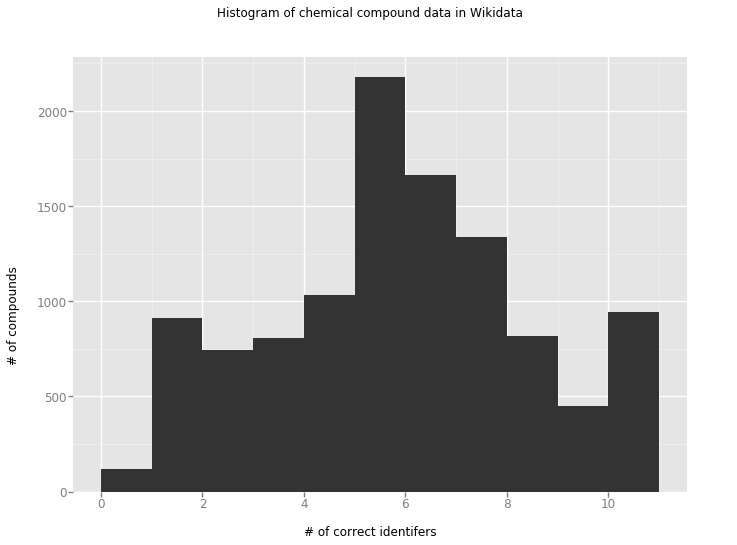

<ggplot: (-9223372036566484571)>

In [15]:
from ggplot import *
p = ggplot(aes(x='t_count'), data=bool_df)
p + geom_histogram(binwidth=1) + ggtitle('Histogram of chemical compound data in Wikidata') + xlab('# of correct identifers') + ylab('# of compounds')


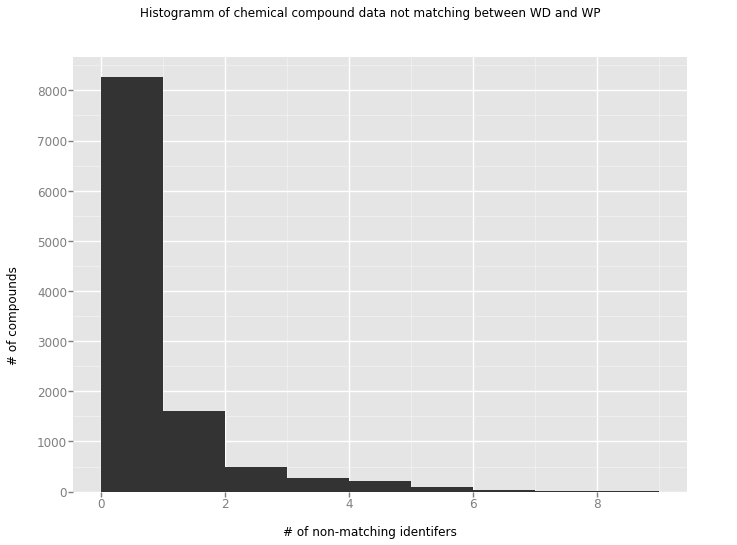

<ggplot: (292161835)>

In [16]:
p2 = ggplot(aes(x='f_count'), data=bool_df)
p2 + geom_histogram(binwidth=1) + ggtitle('Histogramm of chemical compound data not matching between WD and WP') + xlab('# of non-matching identifers') + ylab('# of compounds')

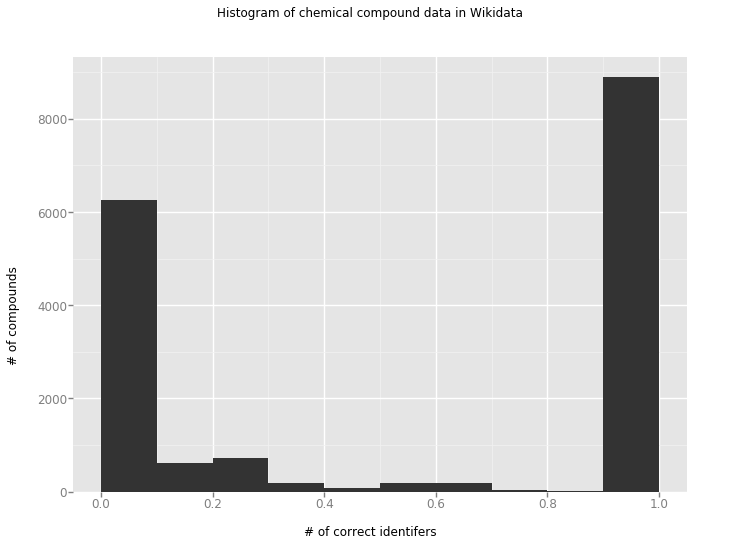

<ggplot: (-9223372036561758972)>

In [17]:
p = ggplot(aes(x='percentage'), data=bool_df)
p + geom_histogram(bin=0.01) + ggtitle('Histogram of chemical compound data in Wikidata') + xlab('# of correct identifers') + ylab('# of compounds')
# import matplotlib.pyplot as plt

# import matplotlib
# matplotlib.style.use('ggplot')

# plt.figure();
# bool_df['percentage'].plot.hist(alpha=0.1)

In [18]:
bool_df.to_csv('bool_df_w_counts_07-2017.csv')

# How do FDA approved drugs in Wikidata perform?

In [21]:
import requests
import sys
import pandas as pd

import wikidataintegrator as wdi

query = '''
SELECT * WHERE {
    ?compound wdt:P31 wd:Q12140 .
}
'''

results = wdi.wdi_core.WDItemEngine.execute_sparql_query(query)
pharm_compounds = pd.DataFrame(columns=bool_df.columns)

for count, cmpnd in enumerate(results['results']['bindings']):
    entity = cmpnd['compound']['value']
    
    if entity in bool_df['cmpnd'].values:
        pharm_compounds = pharm_compounds.append(bool_df.loc[bool_df['cmpnd'].values == entity, :])

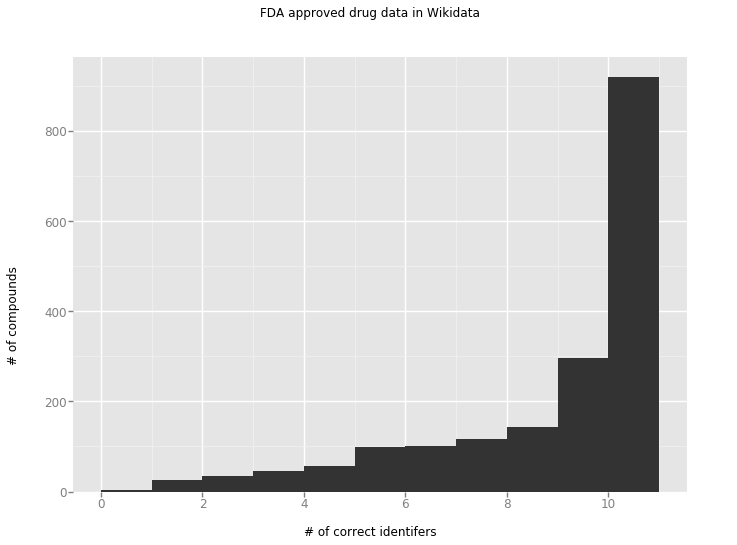

<ggplot: (292925532)>

In [22]:
p = ggplot(aes(x='t_count'), data=pharm_compounds)
p + geom_histogram(binwidth=1) + ggtitle('FDA approved drug data in Wikidata') + xlab('# of correct identifers') + ylab('# of compounds')

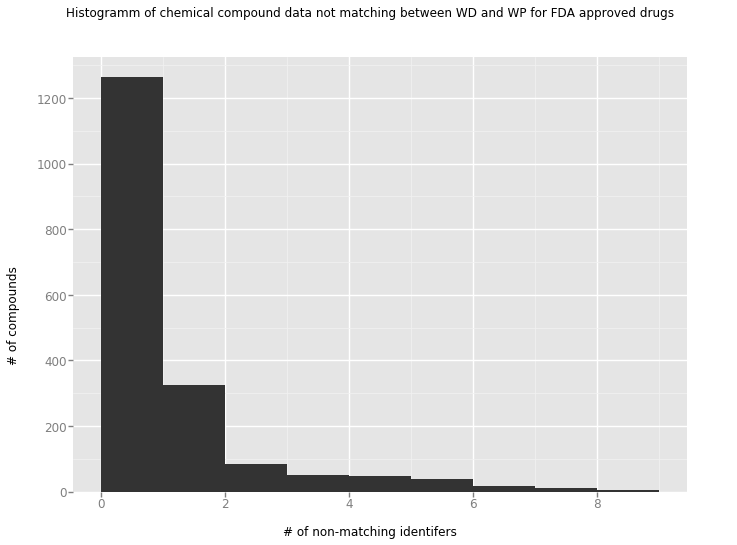

<ggplot: (-9223372036561806420)>

In [23]:
p2 = ggplot(aes(x='f_count'), data=pharm_compounds)
p2 + geom_histogram(binwidth=1) + ggtitle('Histogramm of chemical compound data not matching between WD and WP for FDA approved drugs') + xlab('# of non-matching identifers') + ylab('# of compounds')

In [24]:
ccc = 0
for x in wp_chem_data['page_title']:
    link = 'https://en.wikipedia.org/wiki/' + x
    
    all_stuff.add(x)
    
    if link not in wd_chem_data['article'].values:
        print('| ' + link.replace(' ', '_') + ' || \n |-')
        ccc += 1
print(ccc)

| https://en.wikipedia.org/wiki/Amyl_nitrite || 
 |-
| https://en.wikipedia.org/wiki/BCG_vaccine || 
 |-
| https://en.wikipedia.org/wiki/Coal_tar || 
 |-
| https://en.wikipedia.org/wiki/Gamma-Hydroxybutyric_acid || 
 |-
| https://en.wikipedia.org/wiki/Lysergic_acid_diethylamide || 
 |-
| https://en.wikipedia.org/wiki/Sodium_thiopental || 
 |-
| https://en.wikipedia.org/wiki/Vitamin_C || 
 |-
| https://en.wikipedia.org/wiki/Botulinum_toxin || 
 |-
| https://en.wikipedia.org/wiki/Darbepoetin_alfa || 
 |-
| https://en.wikipedia.org/wiki/MMR_vaccine || 
 |-
| https://en.wikipedia.org/wiki/Salvinorin_A || 
 |-
| https://en.wikipedia.org/wiki/Suxamethonium_chloride || 
 |-
| https://en.wikipedia.org/wiki/Thyrotropin-releasing_hormone || 
 |-
| https://en.wikipedia.org/wiki/Polio_vaccine || 
 |-
| https://en.wikipedia.org/wiki/Whole_blood || 
 |-
| https://en.wikipedia.org/wiki/Vasopressin || 
 |-
| https://en.wikipedia.org/wiki/Pancuronium_bromide || 
 |-
| https://en.wikipedia.org/wiki/Meth

 |-
| https://en.wikipedia.org/wiki/Filibuvir || 
 |-
| https://en.wikipedia.org/wiki/Sebelipase_alfa || 
 |-
| https://en.wikipedia.org/wiki/Triciribine || 
 |-
| https://en.wikipedia.org/wiki/Tranylcypromine/trifluoperazine || 
 |-
| https://en.wikipedia.org/wiki/Ansofaxine || 
 |-
| https://en.wikipedia.org/wiki/Octopamine_(drug) || 
 |-
| https://en.wikipedia.org/wiki/Octopamine_(neurotransmitter) || 
 |-
| https://en.wikipedia.org/wiki/Iodopindolol || 
 |-
| https://en.wikipedia.org/wiki/Buparlisib || 
 |-
| https://en.wikipedia.org/wiki/Bevenopran || 
 |-
| https://en.wikipedia.org/wiki/MIN-101 || 
 |-
| https://en.wikipedia.org/wiki/Pexidartinib || 
 |-
| https://en.wikipedia.org/wiki/Pipethiaden || 
 |-
| https://en.wikipedia.org/wiki/Fenleuton || 
 |-
| https://en.wikipedia.org/wiki/Piperylone || 
 |-
| https://en.wikipedia.org/wiki/Broparestrol || 
 |-
| https://en.wikipedia.org/wiki/Methestrol || 
 |-
| https://en.wikipedia.org/wiki/Cloxestradiol || 
 |-
| https://en.wikiped

 |-
| https://en.wikipedia.org/wiki/Sodium_benzoate || 
 |-
| https://en.wikipedia.org/wiki/Sodium_amide || 
 |-
| https://en.wikipedia.org/wiki/Pyridoxal_phosphate || 
 |-
| https://en.wikipedia.org/wiki/Polyvinyl_butyral || 
 |-
| https://en.wikipedia.org/wiki/Potassium_alum || 
 |-
| https://en.wikipedia.org/wiki/Cinnamic_acid || 
 |-
| https://en.wikipedia.org/wiki/Lithium_nitrate || 
 |-
| https://en.wikipedia.org/wiki/Ibotenic_acid || 
 |-
| https://en.wikipedia.org/wiki/Pyroglutamic_acid || 
 |-
| https://en.wikipedia.org/wiki/Carboxyglutamic_acid || 
 |-
| https://en.wikipedia.org/wiki/Methyl_formate || 
 |-
| https://en.wikipedia.org/wiki/Cocamide_DEA || 
 |-
| https://en.wikipedia.org/wiki/Glycol_stearate || 
 |-
| https://en.wikipedia.org/wiki/Silver_bromide || 
 |-
| https://en.wikipedia.org/wiki/Sodium_metabisulfite || 
 |-
| https://en.wikipedia.org/wiki/CR_gas || 
 |-
| https://en.wikipedia.org/wiki/Ceric_ammonium_nitrate || 
 |-
| https://en.wikipedia.org/wiki/Barium_ca

| https://en.wikipedia.org/wiki/Ammonium_bifluoride || 
 |-
| https://en.wikipedia.org/wiki/Bromocresol_green || 
 |-
| https://en.wikipedia.org/wiki/Beryllium_hydroxide || 
 |-
| https://en.wikipedia.org/wiki/Barium_iodide || 
 |-
| https://en.wikipedia.org/wiki/Calcium_hydride || 
 |-
| https://en.wikipedia.org/wiki/Triacsin_C || 
 |-
| https://en.wikipedia.org/wiki/Eschenmoser's_salt || 
 |-
| https://en.wikipedia.org/wiki/Aluminium_phosphide || 
 |-
| https://en.wikipedia.org/wiki/Caesium_acetate || 
 |-
| https://en.wikipedia.org/wiki/Chromium(IV)_oxide || 
 |-
| https://en.wikipedia.org/wiki/Cetylpyridinium_chloride || 
 |-
| https://en.wikipedia.org/wiki/Silver_sulfate || 
 |-
| https://en.wikipedia.org/wiki/Silver(I)_selenide || 
 |-
| https://en.wikipedia.org/wiki/Silver_subfluoride || 
 |-
| https://en.wikipedia.org/wiki/Silver_azide || 
 |-
| https://en.wikipedia.org/wiki/Silver_chlorate || 
 |-
| https://en.wikipedia.org/wiki/Silver_chromate || 
 |-
| https://en.wikipedia.o

 |-
| https://en.wikipedia.org/wiki/2-Arachidonyl_glyceryl_ether || 
 |-
| https://en.wikipedia.org/wiki/Styrene-acrylonitrile_resin || 
 |-
| https://en.wikipedia.org/wiki/Lactobionic_acid || 
 |-
| https://en.wikipedia.org/wiki/N-Nitrosodiethylamine || 
 |-
| https://en.wikipedia.org/wiki/Uranyl_formate || 
 |-
| https://en.wikipedia.org/wiki/3,5-Dinitrobenzoic_acid || 
 |-
| https://en.wikipedia.org/wiki/Mercury(IV)_fluoride || 
 |-
| https://en.wikipedia.org/wiki/Trimethyl_phosphite || 
 |-
| https://en.wikipedia.org/wiki/Muconic_acid || 
 |-
| https://en.wikipedia.org/wiki/Dehydroacetic_acid || 
 |-
| https://en.wikipedia.org/wiki/Sodium_dehydroacetate || 
 |-
| https://en.wikipedia.org/wiki/Sodium_lactate || 
 |-
| https://en.wikipedia.org/wiki/Potassium_lactate || 
 |-
| https://en.wikipedia.org/wiki/Ammonium_lactate || 
 |-
| https://en.wikipedia.org/wiki/Ammonium_malate || 
 |-
| https://en.wikipedia.org/wiki/Sodium_malate || 
 |-
| https://en.wikipedia.org/wiki/Potassium_mala

 |-
| https://en.wikipedia.org/wiki/Tung_oil || 
 |-
| https://en.wikipedia.org/wiki/Docosanedioic_acid || 
 |-
| https://en.wikipedia.org/wiki/Stenophyllanin_A || 
 |-
| https://en.wikipedia.org/wiki/Glyceollin_I || 
 |-
| https://en.wikipedia.org/wiki/Glycinol_(pterocarpan) || 
 |-
| https://en.wikipedia.org/wiki/Phaseolin_(pterocarpan) || 
 |-
| https://en.wikipedia.org/wiki/Sodium_ethyl_xanthate || 
 |-
| https://en.wikipedia.org/wiki/Thallous_acetate || 
 |-
| https://en.wikipedia.org/wiki/N-Glycolylneuraminic_acid || 
 |-
| https://en.wikipedia.org/wiki/Thymidine_triphosphate || 
 |-
| https://en.wikipedia.org/wiki/Carnosic_acid || 
 |-
| https://en.wikipedia.org/wiki/Grape_reaction_product || 
 |-
| https://en.wikipedia.org/wiki/TAPS_(buffer) || 
 |-
| https://en.wikipedia.org/wiki/TES_(buffer) || 
 |-
| https://en.wikipedia.org/wiki/Bis(pyridine)iodonium(I)_tetrafluoroborate || 
 |-
| https://en.wikipedia.org/wiki/Ammonium_oxalate || 
 |-
| https://en.wikipedia.org/wiki/Glyceol

In [25]:
cid_df = pd.read_csv('bool_df_cids.csv')
print(cid_df.dtypes)
cid_df.head()


cmpnd                object
article              object
pubchem_cid_match    object
dtype: object


,cmpnd,article,pubchem_cid_match
0,http://www.wikidata.org/entity/Q161267,"https://en.wikipedia.org/wiki/1,1,1-Trifluoroe...",True
1,http://www.wikidata.org/entity/Q161264,"https://en.wikipedia.org/wiki/1,1,1,2-Tetrachl...",True
2,http://www.wikidata.org/entity/Q161275,"https://en.wikipedia.org/wiki/1,1,2,2-Tetrachl...",True
3,http://www.wikidata.org/entity/Q161276,"https://en.wikipedia.org/wiki/1,1,2-Trichloro-...",True
4,http://www.wikidata.org/entity/Q161271,https://en.wikipedia.org/wiki/Tetrabromoethane,True


## CIDs of Wikipedia infobox and Wikidata are not matching

In [32]:


print('''{| class="wikitable"
|-
! Wikidata item !! Wikipedia page !! fixed
|-''')

cc = 0
for c, data in cid_df.iterrows():
    if data['pubchem_cid_match'] == False:
        print('| ' + data['cmpnd'] + ' || ' + data['article'].replace(' ', '_')  + ' || \n' + '|-') 
        cc += 1
        
print('|}')
print(cc)

{| class="wikitable"
|-
! Wikidata item !! Wikipedia page !! fixed
|-
| http://www.wikidata.org/entity/Q68414 || https://en.wikipedia.org/wiki/Renzapride || 
|-
| http://www.wikidata.org/entity/Q75892 || https://en.wikipedia.org/wiki/Capeserod || 
|-
| http://www.wikidata.org/entity/Q127900 || https://en.wikipedia.org/wiki/Lactose || 
|-
| http://www.wikidata.org/entity/Q73972 || https://en.wikipedia.org/wiki/Hydroxocobalamin || 
|-
| http://www.wikidata.org/entity/Q165399 || https://en.wikipedia.org/wiki/Azithromycin || 
|-
| http://www.wikidata.org/entity/Q165660 || https://en.wikipedia.org/wiki/Atracurium_besilate || 
|-
| http://www.wikidata.org/entity/Q161601 || https://en.wikipedia.org/wiki/1-Chloro-1,1-difluoroethane || 
|-
| http://www.wikidata.org/entity/Q161475 || https://en.wikipedia.org/wiki/1,2-Dichloroethene || 
|-
| http://www.wikidata.org/entity/Q81890 || https://en.wikipedia.org/wiki/Bismuth_subsalicylate || 
|-
| http://www.wikidata.org/entity/Q82182 || https://en.wik

|-
| http://www.wikidata.org/entity/Q407548 || https://en.wikipedia.org/wiki/Magnesium_hydroxide || 
|-
| http://www.wikidata.org/entity/Q422488 || https://en.wikipedia.org/wiki/Deoxyguanosine || 
|-
| http://www.wikidata.org/entity/Q422631 || https://en.wikipedia.org/wiki/Lamivudine || 
|-
| http://www.wikidata.org/entity/Q422504 || https://en.wikipedia.org/wiki/Deoxycytidine || 
|-
| http://www.wikidata.org/entity/Q414789 || https://en.wikipedia.org/wiki/Pyranine || 
|-
| http://www.wikidata.org/entity/Q422669 || https://en.wikipedia.org/wiki/Nitrofurantoin || 
|-
| http://www.wikidata.org/entity/Q204994 || https://en.wikipedia.org/wiki/Tin(IV)_fluoride || 
|-
| http://www.wikidata.org/entity/Q419935 || https://en.wikipedia.org/wiki/Octreotide || 
|-
| http://www.wikidata.org/entity/Q414854 || https://en.wikipedia.org/wiki/Eriochrome_Black_T || 
|-
| http://www.wikidata.org/entity/Q414825 || https://en.wikipedia.org/wiki/Murexide || 
|-
| http://www.wikidata.org/entity/Q414832 || htt

| http://www.wikidata.org/entity/Q267896 || https://en.wikipedia.org/wiki/Phenprocoumon || 
|-
| http://www.wikidata.org/entity/Q268997 || https://en.wikipedia.org/wiki/Procyclidine || 
|-
| http://www.wikidata.org/entity/Q274515 || https://en.wikipedia.org/wiki/Chloramphenicol || 
|-
| http://www.wikidata.org/entity/Q418408 || https://en.wikipedia.org/wiki/Canavanine || 
|-
| http://www.wikidata.org/entity/Q427956 || https://en.wikipedia.org/wiki/Tannic_acid || 
|-
| http://www.wikidata.org/entity/Q411159 || https://en.wikipedia.org/wiki/Famotidine || 
|-
| http://www.wikidata.org/entity/Q278387 || https://en.wikipedia.org/wiki/Tricalcium_phosphate || 
|-
| http://www.wikidata.org/entity/Q470449 || https://en.wikipedia.org/wiki/Amezinium_metilsulfate || 
|-
| http://www.wikidata.org/entity/Q883666 || https://en.wikipedia.org/wiki/Lead(II)_phosphate || 
|-
| http://www.wikidata.org/entity/Q904011 || https://en.wikipedia.org/wiki/Desonide || 
|-
| http://www.wikidata.org/entity/Q286126 

In [27]:
# what are the WP articles not showing up in the WP set (bc they don't have chem or drugbox)?
comp = {x[30:] for x in wd_chem_data['article'].values}.difference(set(wp_chem_data['page_title'].values))

with_cid_count = 0
with_cid_store = []
for index, x in wd_chem_data.iterrows():
    article = x['article'][30:]
    if article in comp:
        url_string = 'https://en.wikipedia.org/wiki/{}'.format(article).replace(' ', '_')
        print(url_string)
        
        if pd.notnull(wd_chem_data.loc[index, 'pubchem_cid']):
            with_cid_store.append((index, url_string))
            with_cid_count += 1

print(len(comp))
print(with_cid_count)

for x in with_cid_store:
    print(x[0], x[1])


https://en.wikipedia.org/wiki/Polyethylene_terephthalate
https://en.wikipedia.org/wiki/Phenol_formaldehyde_resin
https://en.wikipedia.org/wiki/Polyimide
https://en.wikipedia.org/wiki/Lactic_acid
https://en.wikipedia.org/wiki/Poly(methyl_methacrylate)
https://en.wikipedia.org/wiki/Binary_compound
https://en.wikipedia.org/wiki/Cellulose_acetate
https://en.wikipedia.org/wiki/Polyphenylene_sulfide
https://en.wikipedia.org/wiki/Cyclic_compound
https://en.wikipedia.org/wiki/2-Butoxyethanol_acetate
https://en.wikipedia.org/wiki/Motilin
https://en.wikipedia.org/wiki/Polyurethane
https://en.wikipedia.org/wiki/Titanium_tetrafluoride
https://en.wikipedia.org/wiki/Kerosene
https://en.wikipedia.org/wiki/Valerenic_acid
https://en.wikipedia.org/wiki/Nonoxynols
https://en.wikipedia.org/wiki/Sapphire
https://en.wikipedia.org/wiki/Trypsin
https://en.wikipedia.org/wiki/Unsymmetrical_dimethylhydrazine
https://en.wikipedia.org/wiki/1-Naphthaleneacetic_acid
https://en.wikipedia.org/wiki/Lithium_hydride
http

https://en.wikipedia.org/wiki/Titanium_nitride
https://en.wikipedia.org/wiki/Interferon
https://en.wikipedia.org/wiki/Linalyl_acetate
https://en.wikipedia.org/wiki/Sodium_carbonate
https://en.wikipedia.org/wiki/Growth_hormone
https://en.wikipedia.org/wiki/Ammonium_thiocyanate
https://en.wikipedia.org/wiki/Aluminium_nitrate
https://en.wikipedia.org/wiki/Cholinesterase
https://en.wikipedia.org/wiki/Carotene
https://en.wikipedia.org/wiki/Mercury_selenide
https://en.wikipedia.org/wiki/Gluten
https://en.wikipedia.org/wiki/Pentaerythritol_tetranitrate
https://en.wikipedia.org/wiki/Picric_acid
https://en.wikipedia.org/wiki/Acetylide
https://en.wikipedia.org/wiki/Miraculin
https://en.wikipedia.org/wiki/Sodium_amide
https://en.wikipedia.org/wiki/Dibutyl_phthalate
https://en.wikipedia.org/wiki/Hypochlorous_acid
https://en.wikipedia.org/wiki/Hemicellulose
https://en.wikipedia.org/wiki/Ethylene_oxide
https://en.wikipedia.org/wiki/Chlorous_acid
https://en.wikipedia.org/wiki/Propylene_carbonate
http

https://en.wikipedia.org/wiki/Caramel_color
https://en.wikipedia.org/wiki/Itaconic_acid
https://en.wikipedia.org/wiki/Cobalt(II)_bromide
https://en.wikipedia.org/wiki/Reactive_nitrogen_species
https://en.wikipedia.org/wiki/Cerotic_acid
https://en.wikipedia.org/wiki/Levulinic_acid
https://en.wikipedia.org/wiki/Propargyl_alcohol
https://en.wikipedia.org/wiki/Calcium_formate
https://en.wikipedia.org/wiki/Diisodecyl_phthalate
https://en.wikipedia.org/wiki/Angelic_acid
https://en.wikipedia.org/wiki/Isoamyl_acetate
https://en.wikipedia.org/wiki/3-Phosphoglyceric_acid
https://en.wikipedia.org/wiki/Isoamyl_alcohol
https://en.wikipedia.org/wiki/Beta-Nitropropionic_acid
https://en.wikipedia.org/wiki/3-hydroxyanthranilate_3,4-dioxygenase
https://en.wikipedia.org/wiki/Beta-Hydroxy_beta-methylbutyric_acid
https://en.wikipedia.org/wiki/Beta-Hydroxybutyric_acid
https://en.wikipedia.org/wiki/Tetraamminecopper(II)_sulfate
https://en.wikipedia.org/wiki/4-Hydroxybenzoic_acid
https://en.wikipedia.org/wiki

https://en.wikipedia.org/wiki/Promethium(III)_chloride
https://en.wikipedia.org/wiki/Hexatriacontanoic_acid
https://en.wikipedia.org/wiki/Methyl_bisulfate
https://en.wikipedia.org/wiki/Olpadronic_acid
https://en.wikipedia.org/wiki/Alpha-Parinaric_acid
https://en.wikipedia.org/wiki/Linolelaidic_acid
https://en.wikipedia.org/wiki/Mesoxalic_acid
https://en.wikipedia.org/wiki/Neuraminic_acid
https://en.wikipedia.org/wiki/Orthoformic_acid
https://en.wikipedia.org/wiki/Rhodizonic_acid
https://en.wikipedia.org/wiki/Sapienic_acid
https://en.wikipedia.org/wiki/Jacaric_acid
https://en.wikipedia.org/wiki/Minodronic_acid
https://en.wikipedia.org/wiki/Meclofenamic_acid
https://en.wikipedia.org/wiki/Muramic_acid
https://en.wikipedia.org/wiki/Lysophosphatidic_acid
https://en.wikipedia.org/wiki/Medronic_acid
https://en.wikipedia.org/wiki/Permanganic_acid
https://en.wikipedia.org/wiki/Pinolenic_acid
https://en.wikipedia.org/wiki/Sucrononic_acid
https://en.wikipedia.org/wiki/Thiolactic_acid
https://en.w

https://en.wikipedia.org/wiki/Iodobenzene_dichloride
https://en.wikipedia.org/wiki/Hydroxyethyl_methyl_cellulose
https://en.wikipedia.org/wiki/Hyodeoxycholic_acid
https://en.wikipedia.org/wiki/Hydrocortisone_buteprate
https://en.wikipedia.org/wiki/Hydroxyethylrutoside
https://en.wikipedia.org/wiki/Hypoglycin_B
https://en.wikipedia.org/wiki/ICRF_193
https://en.wikipedia.org/wiki/Tetraethylammonium_bromide
https://en.wikipedia.org/wiki/Methylenomycin_A
https://en.wikipedia.org/wiki/Methylprednisolone_aceponate
https://en.wikipedia.org/wiki/Imidazole-1-sulfonyl_azide
https://en.wikipedia.org/wiki/Methylmercuric_dicyanamide
https://en.wikipedia.org/wiki/Methylenomycin_B
https://en.wikipedia.org/wiki/Methylscopolamine_bromide
https://en.wikipedia.org/wiki/Acetaldehyde_ammonia_trimer
https://en.wikipedia.org/wiki/Acetic_formic_anhydride
https://en.wikipedia.org/wiki/Molybdenum(II)_acetate
https://en.wikipedia.org/wiki/Molybdocene_dichloride
https://en.wikipedia.org/wiki/Monoethanolamine_olea

https://en.wikipedia.org/wiki/Orthosilicate_(ion)
https://en.wikipedia.org/wiki/2-Fluorobenzoic_acid
https://en.wikipedia.org/wiki/Methylprednisolone_acetate
https://en.wikipedia.org/wiki/Hydrocortisone_cypionate
https://en.wikipedia.org/wiki/Hydrocortisone_sodium_phosphate
https://en.wikipedia.org/wiki/Prednisolone_acetate
https://en.wikipedia.org/wiki/Prednisolone_tebutate
https://en.wikipedia.org/wiki/Triamcinolone_diacetate
https://en.wikipedia.org/wiki/Vincamajine
https://en.wikipedia.org/wiki/Difluoroacetic_acid
https://en.wikipedia.org/wiki/Hafnium_acetylacetonate
https://en.wikipedia.org/wiki/Iron_tetraboride
https://en.wikipedia.org/wiki/Sudan_II
https://en.wikipedia.org/wiki/Dibromine_monoxide
https://en.wikipedia.org/wiki/Isonipecotic_acid
https://en.wikipedia.org/wiki/Crotyl_chloride
https://en.wikipedia.org/wiki/4-Nonylphenylboronic_acid
https://en.wikipedia.org/wiki/Coumermycin_A1
https://en.wikipedia.org/wiki/Etofylline_nicotinate
https://en.wikipedia.org/wiki/Barcelonei

http://www.wikidata.org/entity/Q903387 https://en.wikipedia.org/wiki/Dehydrocholic_acid
http://www.wikidata.org/entity/Q903911 https://en.wikipedia.org/wiki/Polyallylamine_hydrochloride
http://www.wikidata.org/entity/Q903636 https://en.wikipedia.org/wiki/Potassium_bis(trimethylsilyl)amide
http://www.wikidata.org/entity/Q903566 https://en.wikipedia.org/wiki/Homovanillic_acid
http://www.wikidata.org/entity/Q905723 https://en.wikipedia.org/wiki/Calcium_chromate
http://www.wikidata.org/entity/Q240557 https://en.wikipedia.org/wiki/Phosphorus_pentabromide
http://www.wikidata.org/entity/Q905731 https://en.wikipedia.org/wiki/Isopropyl_nitrate
http://www.wikidata.org/entity/Q229924 https://en.wikipedia.org/wiki/4-Aminosalicylic_acid
http://www.wikidata.org/entity/Q229946 https://en.wikipedia.org/wiki/4-Chloromercuribenzoic_acid
http://www.wikidata.org/entity/Q905750 https://en.wikipedia.org/wiki/Nitrous_oxide
http://www.wikidata.org/entity/Q413692 https://en.wikipedia.org/wiki/Phosphatidylinosi

http://www.wikidata.org/entity/Q5206094 https://en.wikipedia.org/wiki/DS-1_(drug)
http://www.wikidata.org/entity/Q2650092 https://en.wikipedia.org/wiki/Yttrium-90
http://www.wikidata.org/entity/Q2647468 https://en.wikipedia.org/wiki/Dicopper_chloride_trihydroxide
http://www.wikidata.org/entity/Q2645893 https://en.wikipedia.org/wiki/Ammonium_diethyl_dithiophosphate
http://www.wikidata.org/entity/Q2649761 https://en.wikipedia.org/wiki/Cyclic_di-GMP
http://www.wikidata.org/entity/Q2651741 https://en.wikipedia.org/wiki/Aluminium_diacetate
http://www.wikidata.org/entity/Q2652757 https://en.wikipedia.org/wiki/Allyl_methyl_sulfide
http://www.wikidata.org/entity/Q2653981 https://en.wikipedia.org/wiki/Citrus_Red_2
http://www.wikidata.org/entity/Q2657418 https://en.wikipedia.org/wiki/Iron(II)_acetate
http://www.wikidata.org/entity/Q4545703 https://en.wikipedia.org/wiki/1,5-Anhydroglucitol
http://www.wikidata.org/entity/Q2657198 https://en.wikipedia.org/wiki/Pertechnetic_acid
http://www.wikidata.

In [28]:
# which WD items,linked via interwiki links, do not have enought data in order to consider them 
# chemical compounds (e.g. only have an English label, but are empty otherwise)
comp = set(wp_chem_data['page_title'].values).difference({x[30:] for x in wd_chem_data['article'].values})
#set(wp_chem_data['page_title'].values)
print(len(comp))

6305


In [29]:
# determine which WP infoboxes lack CID although WD has one
wp_cid_missing_count = 0
print('''{| class="wikitable"
|-
! Wikidata item !! Wikipedia page !! fixed
|-''')
for index, data in wd_chem_data.iterrows():
    article = data['article'][30:]
    cid = data['pubchem_cid']
    if pd.notnull(data['pubchem_cid']):
        if article in wp_chem_data['page_title'].values:
            wp_index = wp_chem_data['page_title'].values.tolist().index(article)
#             print(wp_chem_data['PubChem'].values[wp_index])
            if pd.isnull(wp_chem_data['PubChem'].values[wp_index]):
                
                print('| ' + get_qid(article) + ' || ' + data['article'].replace(' ', '_')  + ' || \n|-')
                wp_cid_missing_count += 1
print('|}')            
print(wp_cid_missing_count)

{| class="wikitable"
|-
! Wikidata item !! Wikipedia page !! fixed
|-
|  || https://en.wikipedia.org/wiki/1,1-Difluoroethylene || 
|-
|  || https://en.wikipedia.org/wiki/1,2,3-Trichloropropane || 
|-
|  || https://en.wikipedia.org/wiki/1,2,3-Triazole || 
|-
| http://www.wikidata.org/entity/Q80294 || https://en.wikipedia.org/wiki/Cellulose || 
|-
|  || https://en.wikipedia.org/wiki/1,2-Bis(diphenylphosphino)ethane || 
|-
|  || https://en.wikipedia.org/wiki/1,2-Dibromo-3-chloropropane || 
|-
|  || https://en.wikipedia.org/wiki/1,2-Butanediol || 
|-
| http://www.wikidata.org/entity/Q161679 || https://en.wikipedia.org/wiki/Propanethiol || 
|-
| http://www.wikidata.org/entity/Q161683 || https://en.wikipedia.org/wiki/1-Tetradecanol || 
|-
|  || https://en.wikipedia.org/wiki/1,4-Dioxin || 
|-
|  || https://en.wikipedia.org/wiki/1,4-Dichlorobenzene || 
|-
|  || https://en.wikipedia.org/wiki/1,4-Butanediol || 
|-
|  || https://en.wikipedia.org/wiki/1,4-Dioxane || 
|-
| http://www.wikidata.org/e

| http://www.wikidata.org/entity/Q209450 || https://en.wikipedia.org/wiki/2-Naphthylamine || 
|-
|  || https://en.wikipedia.org/wiki/2,4-Dinitrophenylhydrazine || 
|-
| http://www.wikidata.org/entity/Q209364 || https://en.wikipedia.org/wiki/2-Chloropyridine || 
|-
| http://www.wikidata.org/entity/Q209381 || https://en.wikipedia.org/wiki/2-Ethoxyethanol || 
|-
| http://www.wikidata.org/entity/Q209444 || https://en.wikipedia.org/wiki/2-Methyltetrahydrofuran || 
|-
| http://www.wikidata.org/entity/Q419070 || https://en.wikipedia.org/wiki/Merbromin || 
|-
| http://www.wikidata.org/entity/Q412118 || https://en.wikipedia.org/wiki/Tetrahydrothiophene || 
|-
| http://www.wikidata.org/entity/Q419283 || https://en.wikipedia.org/wiki/Diphosgene || 
|-
| http://www.wikidata.org/entity/Q419308 || https://en.wikipedia.org/wiki/Anabasine || 
|-
| http://www.wikidata.org/entity/Q423065 || https://en.wikipedia.org/wiki/Chloropicrin || 
|-
| http://www.wikidata.org/entity/Q419167 || https://en.wikipedia

| http://www.wikidata.org/entity/Q926392 || https://en.wikipedia.org/wiki/3-Bromobenzaldehyde || 
|-
| http://www.wikidata.org/entity/Q909359 || https://en.wikipedia.org/wiki/Marbofloxacin || 
|-
| http://www.wikidata.org/entity/Q252251 || https://en.wikipedia.org/wiki/Cyanocobalamin || 
|-
| http://www.wikidata.org/entity/Q252602 || https://en.wikipedia.org/wiki/Momelotinib || 
|-
| http://www.wikidata.org/entity/Q414492 || https://en.wikipedia.org/wiki/Salicylaldehyde || 
|-
| http://www.wikidata.org/entity/Q414242 || https://en.wikipedia.org/wiki/Cathinone || 
|-
| http://www.wikidata.org/entity/Q425072 || https://en.wikipedia.org/wiki/Maitotoxin || 
|-
| http://www.wikidata.org/entity/Q425064 || https://en.wikipedia.org/wiki/Samandarin || 
|-
|  || https://en.wikipedia.org/wiki/Dibenzo-1,4-dioxin || 
|-
| http://www.wikidata.org/entity/Q425376 || https://en.wikipedia.org/wiki/Azetidine || 
|-
| http://www.wikidata.org/entity/Q425389 || https://en.wikipedia.org/wiki/DCMU || 
|-
| ht

|-
| http://www.wikidata.org/entity/Q654611 || https://en.wikipedia.org/wiki/Argadin || 
|-
|  || https://en.wikipedia.org/wiki/Benzo(ghi)perylene || 
|-
| http://www.wikidata.org/entity/Q2273248 || https://en.wikipedia.org/wiki/Phosphatidylinositol || 
|-
|  || https://en.wikipedia.org/wiki/3,3',5,5'-Tetramethylbenzidine || 
|-
|  || https://en.wikipedia.org/wiki/1,4-Cyclohexanedione || 
|-
| http://www.wikidata.org/entity/Q1623593 || https://en.wikipedia.org/wiki/Tebipenem || 
|-
|  || https://en.wikipedia.org/wiki/6-Acetyl-2,3,4,5-tetrahydropyridine || 
|-
| http://www.wikidata.org/entity/Q1826394 || https://en.wikipedia.org/wiki/Isobutylgermane || 
|-
| http://www.wikidata.org/entity/Q1786341 || https://en.wikipedia.org/wiki/Selenourea || 
|-
| http://www.wikidata.org/entity/Q3491377 || https://en.wikipedia.org/wiki/Methylisopropyltryptamine || 
|-
| http://www.wikidata.org/entity/Q3491314 || https://en.wikipedia.org/wiki/4-Acetoxy-DET || 
|-
|  || https://en.wikipedia.org/wiki/Ben

|  || https://en.wikipedia.org/wiki/1,1,3-Trichloropropene || 
|-
|  || https://en.wikipedia.org/wiki/1,3-Benzodioxolyl-N-methylpentanamine || 
|-
|  || https://en.wikipedia.org/wiki/1,3-Benzodioxolyl-N-ethylpentanamine || 
|-
|  || https://en.wikipedia.org/wiki/1,1,1,3,3,3-Hexafluoropropane || 
|-
|  || https://en.wikipedia.org/wiki/1,3-Propanedithiol || 
|-
| http://www.wikidata.org/entity/Q4735230 || https://en.wikipedia.org/wiki/Alphacetylmethadol || 
|-
| http://www.wikidata.org/entity/Q4780565 || https://en.wikipedia.org/wiki/Aporphine || 
|-
| http://www.wikidata.org/entity/Q3278296 || https://en.wikipedia.org/wiki/2-Methyl-2-pentanol || 
|-
| http://www.wikidata.org/entity/Q3278289 || https://en.wikipedia.org/wiki/3-Methyl-2-pentanol || 
|-
| http://www.wikidata.org/entity/Q3278308 || https://en.wikipedia.org/wiki/2-Methyl-1-pentanol || 
|-
| http://www.wikidata.org/entity/Q3278324 || https://en.wikipedia.org/wiki/3-Methyl-1-pentanol || 
|-
| http://www.wikidata.org/entity/Q327

|-
| http://www.wikidata.org/entity/Q6109221 || https://en.wikipedia.org/wiki/JWH-359 || 
|-
| http://www.wikidata.org/entity/Q7336745 || https://en.wikipedia.org/wiki/Ritipenem || 
|-
| http://www.wikidata.org/entity/Q4692957 || https://en.wikipedia.org/wiki/Agmatidine || 
|-
| http://www.wikidata.org/entity/Q5460214 || https://en.wikipedia.org/wiki/Flopristin || 
|-
|  || https://en.wikipedia.org/wiki/AC-262,356 || 
|-
| http://www.wikidata.org/entity/Q5375179 || https://en.wikipedia.org/wiki/Enalaprilat || 
|-
| http://www.wikidata.org/entity/Q7041263 || https://en.wikipedia.org/wiki/Nithiazine || 
|-
| http://www.wikidata.org/entity/Q5404486 || https://en.wikipedia.org/wiki/Ethylhexylglycerin || 
|-
| http://www.wikidata.org/entity/Q6927482 || https://en.wikipedia.org/wiki/Moxazocine || 
|-
| http://www.wikidata.org/entity/Q5462882 || https://en.wikipedia.org/wiki/Fluparoxan || 
|-
| http://www.wikidata.org/entity/Q5469311 || https://en.wikipedia.org/wiki/Foretinib || 
|-
| http://

| http://www.wikidata.org/entity/Q19903876 || https://en.wikipedia.org/wiki/Copanlisib || 
|-
| http://www.wikidata.org/entity/Q19904066 || https://en.wikipedia.org/wiki/Enduracididine || 
|-
| http://www.wikidata.org/entity/Q15409409 || https://en.wikipedia.org/wiki/Ledipasvir || 
|-
| http://www.wikidata.org/entity/Q15410168 || https://en.wikipedia.org/wiki/Zotarolimus || 
|-
| http://www.wikidata.org/entity/Q19462214 || https://en.wikipedia.org/wiki/Dasabuvir || 
|-
|  || https://en.wikipedia.org/wiki/Bis(triethoxysilylpropyl)tetrasulfide || 
|-
| http://www.wikidata.org/entity/Q19903502 || https://en.wikipedia.org/wiki/Lanabecestat || 
|-
| http://www.wikidata.org/entity/Q21098891 || https://en.wikipedia.org/wiki/SRX246 || 
|-
| http://www.wikidata.org/entity/Q21098931 || https://en.wikipedia.org/wiki/FMISO || 
|-
| http://www.wikidata.org/entity/Q7932801 || https://en.wikipedia.org/wiki/Vintafolide || 
|-
| http://www.wikidata.org/entity/Q7914945 || https://en.wikipedia.org/wiki/V

In [30]:
print('''{| class="wikitable"
|-
! Wikidata item !! Wikipedia page !! fixed
|-''')

# determine which WD item lack CID although WP infobox has one
wd_cid_missing_count = 0
interwikilinks = [x[30:] for x in wd_chem_data['article'].values]
#print(len(interwikilinks))
#print(len(set(interwikilinks)))
for index, data in wp_chem_data.iterrows():
    article = data['page_title']
    
    cid = data['PubChem']
    if pd.notnull(data['PubChem']):
        if article in interwikilinks:
            wd_index = interwikilinks.index(article)
            
            if pd.isnull(wd_chem_data['pubchem_cid'].values[wd_index]):
                print('| ' + get_qid(article) + ' || ' + 'https://en.wikipedia.org/wiki/{}'
                      .format(data['page_title']).replace(' ', '_')  + ' || \n|-')
                wd_cid_missing_count += 1
            
print('|}')
print(wd_cid_missing_count)

{| class="wikitable"
|-
! Wikidata item !! Wikipedia page !! fixed
|-
| http://www.wikidata.org/entity/Q682 || https://en.wikipedia.org/wiki/Sulfur || 
|-
| http://www.wikidata.org/entity/Q423098 || https://en.wikipedia.org/wiki/Neomycin || 
|-
| http://www.wikidata.org/entity/Q935761 || https://en.wikipedia.org/wiki/Adderall || 
|-
| http://www.wikidata.org/entity/Q33150707 || https://en.wikipedia.org/wiki/Fluprednidene || 
|-
| http://www.wikidata.org/entity/Q3221490 || https://en.wikipedia.org/wiki/Meprodine || 
|-
| http://www.wikidata.org/entity/Q411588 || https://en.wikipedia.org/wiki/Eltrombopag || 
|-
|  || https://en.wikipedia.org/wiki/LY-503,430 || 
|-
| http://www.wikidata.org/entity/Q2938837 || https://en.wikipedia.org/wiki/Cariprazine || 
|-
| http://www.wikidata.org/entity/Q7946880 || https://en.wikipedia.org/wiki/WAY-161503 || 
|-
| http://www.wikidata.org/entity/Q5514489 || https://en.wikipedia.org/wiki/GRN-529 || 
|-
| http://www.wikidata.org/entity/Q5205912 || https:/

| http://www.wikidata.org/entity/Q2680367 || https://en.wikipedia.org/wiki/Decamethylcobaltocene || 
|-
|  || https://en.wikipedia.org/wiki/Tris(2-pyridylmethyl)amine || 
|-
| http://www.wikidata.org/entity/Q7456835 || https://en.wikipedia.org/wiki/Setrobuvir || 
|-
| http://www.wikidata.org/entity/Q7390266 || https://en.wikipedia.org/wiki/SIB-1553A || 
|-
| http://www.wikidata.org/entity/Q6456076 || https://en.wikipedia.org/wiki/L-694247 || 
|-
| http://www.wikidata.org/entity/Q6585045 || https://en.wikipedia.org/wiki/YM-31636 || 
|-
| http://www.wikidata.org/entity/Q15133281 || https://en.wikipedia.org/wiki/Ichthyothereol || 
|-
| http://www.wikidata.org/entity/Q7376093 || https://en.wikipedia.org/wiki/Rubicordifolin || 
|-
| http://www.wikidata.org/entity/Q7333206 || https://en.wikipedia.org/wiki/Rifalazil || 
|-
|  || https://en.wikipedia.org/wiki/(S)-iPr-PHOX || 
|-
| http://www.wikidata.org/entity/Q5530325 || https://en.wikipedia.org/wiki/GelGreen || 
|-
| http://www.wikidata.org